In [1]:
%matplotlib inline

In [2]:
import numpy as np
from numpy.random import rand
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from math import sqrt

In [8]:
chamber_eff = pd.DataFrame()

In [27]:
chamber_eff = pd.DataFrame()
for i in xrange(1,8):
    temp_df = pd.read_csv('data/chamber_efficiency_targ_%d.txt' % i, sep='\t')
    temp_df.insert(0, "target", i)
    chamber_eff = pd.concat([chamber_eff, temp_df])
chamber_eff['midElementID'] = ((chamber_eff['maxElementID'] + chamber_eff['minElementID'])/2.0)
chamber_eff['section'] = np.floor(chamber_eff.midElementID/(chamber_eff.maxElementID - chamber_eff.minElementID))
chamber_eff['section'] = chamber_eff['section'].astype(int)
chamber_eff = chamber_eff.drop('midElementID', axis=1)

In [28]:
chamber_eff.query('target == 5').head()

target detectorName  minElementID  maxElementID  intensity  efficiency  \
0       5          D1U             1            40       5000      0.9489   
1       5          D1U             1            40      15000      0.9460   
2       5          D1U             1            40      25000      0.9142   
3       5          D1U             1            40      35000      0.9017   
4       5          D1U             1            40      45000      0.8582   

   uncertainty  section  
0       0.0197        0  
1       0.0116        0  
2       0.0131        0  
3       0.0159        0  
4       0.0211        0

In [29]:
hodo_mask = pd.read_csv('data/hodomask.csv', sep='\t')
hodo_mask.head(1)

stationID  hodoDetectorID hodoDetectorName  hodoElementID  wireDetectorID  \
0          1              25              H1B              1               1   

  wireDetectorName  wireElementID  
0              D1U              1

In [30]:
trigger_roads = pd.read_csv('data/triggerroads.csv', sep='\t', index_col='roadID')
trigger_roads.head(5)

detectorHalf  H1  H2  H3  H4
roadID                             
-77294            B  19  14  15  14
-77293            B  19  14  15  13
-77277            B  19  14  14  13
-77276            B  19  14  14  12
-77260            B  19  14  13  12

In [31]:
CONST_H1 = 16*16*16
CONST_H2 = 16*16
CONST_H3 = 16
CONST_H4 = 1

class Road:
        
    def __init__(self, roadID):
        self.roadID = roadID
        self.detectorHalf = self.getTB()
        self.H1 = self.getH1ElementID()
        self.H2 = self.getH2ElementID()
        self.H3 = self.getH3ElementID()
        self.H4 = self.getH4ElementID()    
    
    def getTB(self):
        if self.roadID > 0:
            return "T"
        else:
            return "B"

    def getH1ElementID(self):
        elementID = (abs(self.roadID)-1)//CONST_H1 + 1
        return elementID

    def getH2ElementID(self):
        elementID = ((abs(self.roadID)-1)//CONST_H2)%16 + 1
        return elementID

    def getH3ElementID(self):
        elementID = ((abs(self.roadID)-1)//CONST_H3)%16 + 1
        return elementID

    def getH4ElementID(self):
        elementID = ((abs(self.roadID)-1)//CONST_H4)%16 + 1
        return elementID

    def info(self):
        print ("detectorHalf: %s\nH1: %d\nH2: %d\nH3: %d\nH4: %d" %
               (self.detectorHalf, self.H1, self.H2, self.H3, self.H4))

In [32]:
def getRoadID(detectorHalf, H1, H2, H3, H4):
    roadID = (H1-1)*CONST_H1 + (H2-1)*CONST_H2 + (H3-1)*CONST_H3 + H4*CONST_H4
    if self.detectorHalf == "B":
        roadID *= -1
    return roadID

In [33]:
def closest_road(road_df, roadID):
    my_road = Road(roadID)
    my_road_df = road_df.query('detectorHalf == @my_road.detectorHalf and roadID != @roadID').copy()
    my_road_df['distance'] = my_road_df.apply(
        lambda x: sqrt(3*(x.H1 - my_road.H1)**2 + 2*(x.H2 - my_road.H2)**2 + (x.H3 - my_road.H3)**2), axis=1)
    return my_road_df.distance.argmin()

# Plot efficiencies for reference

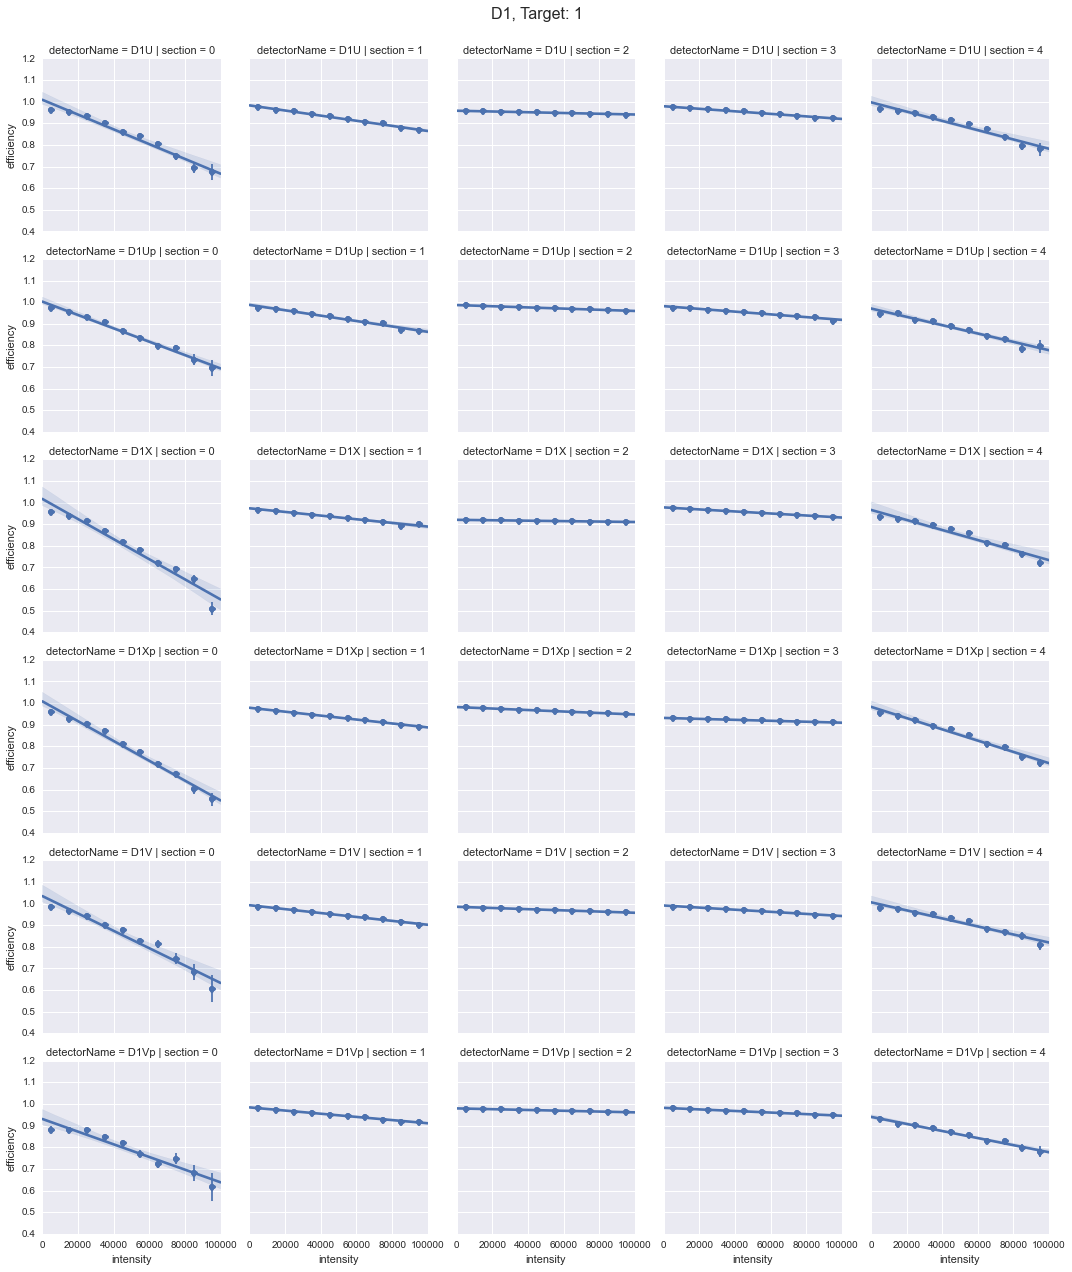

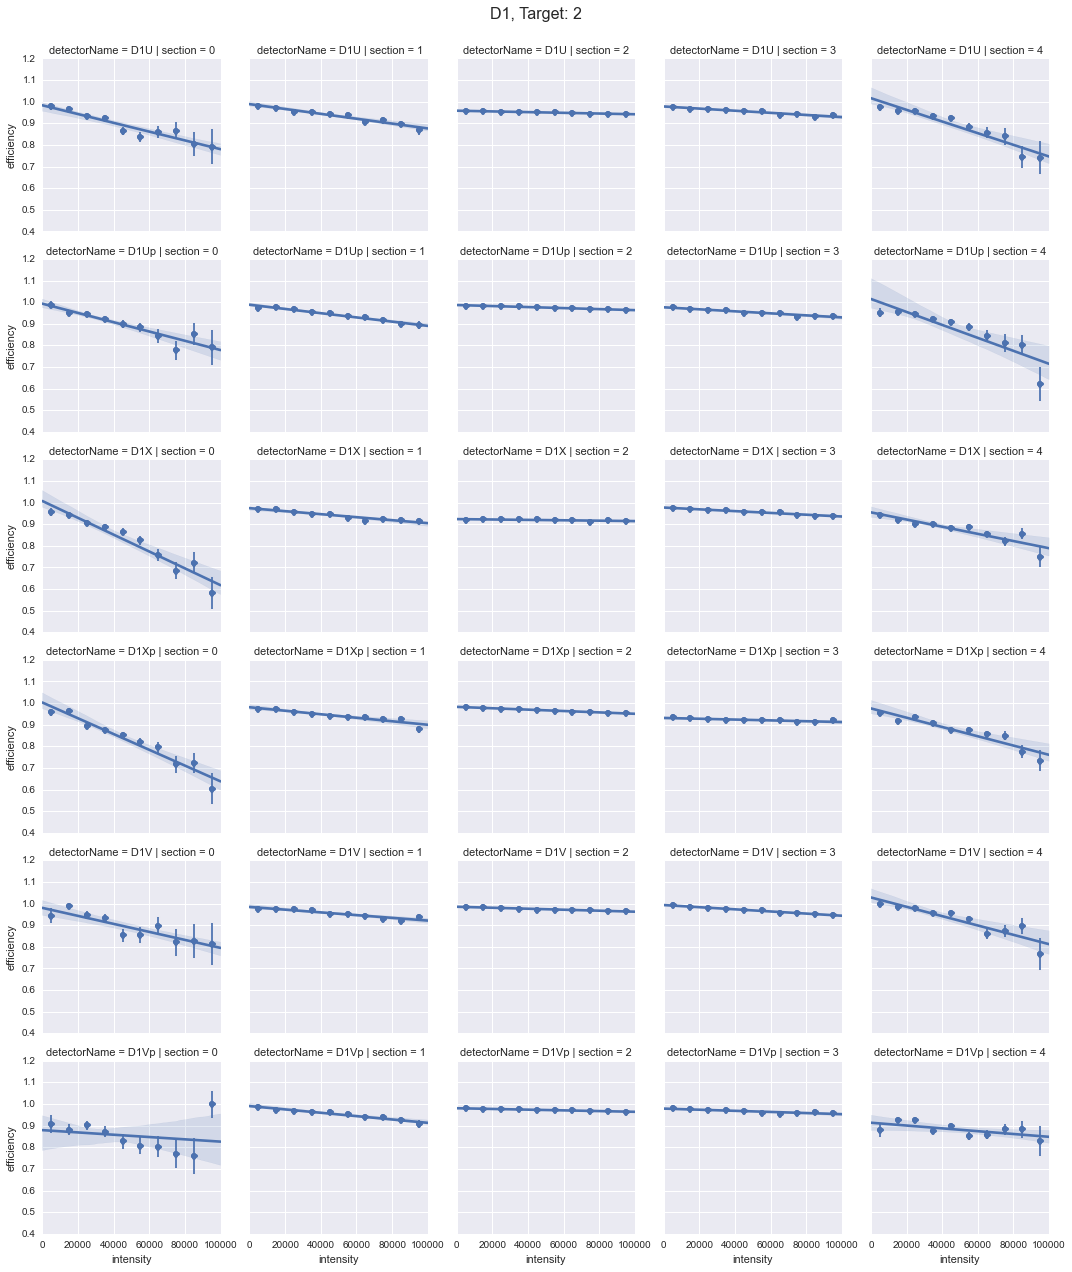

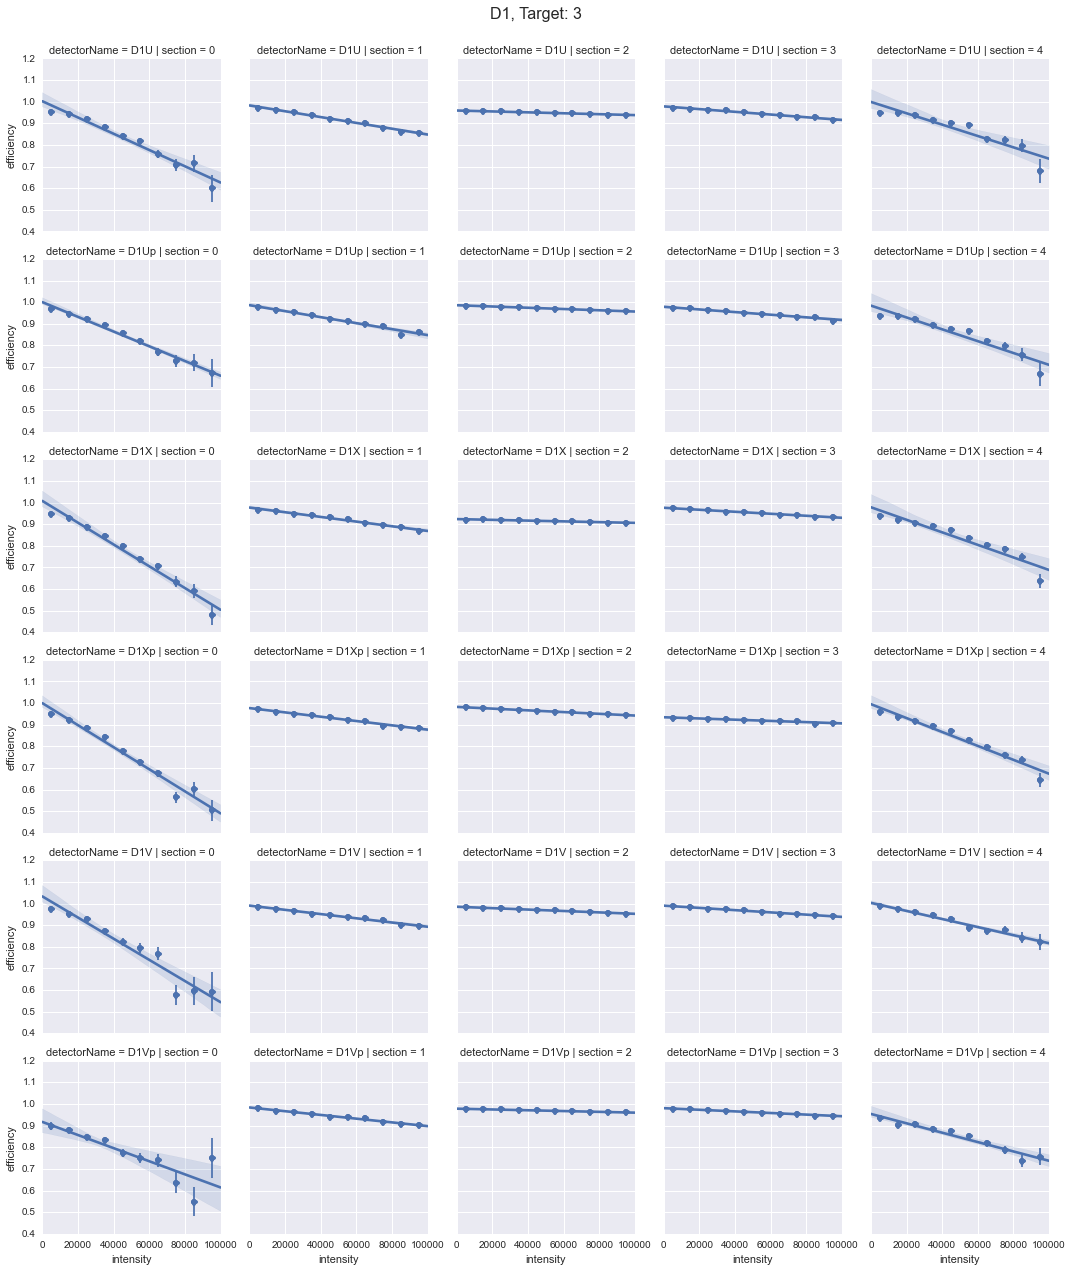

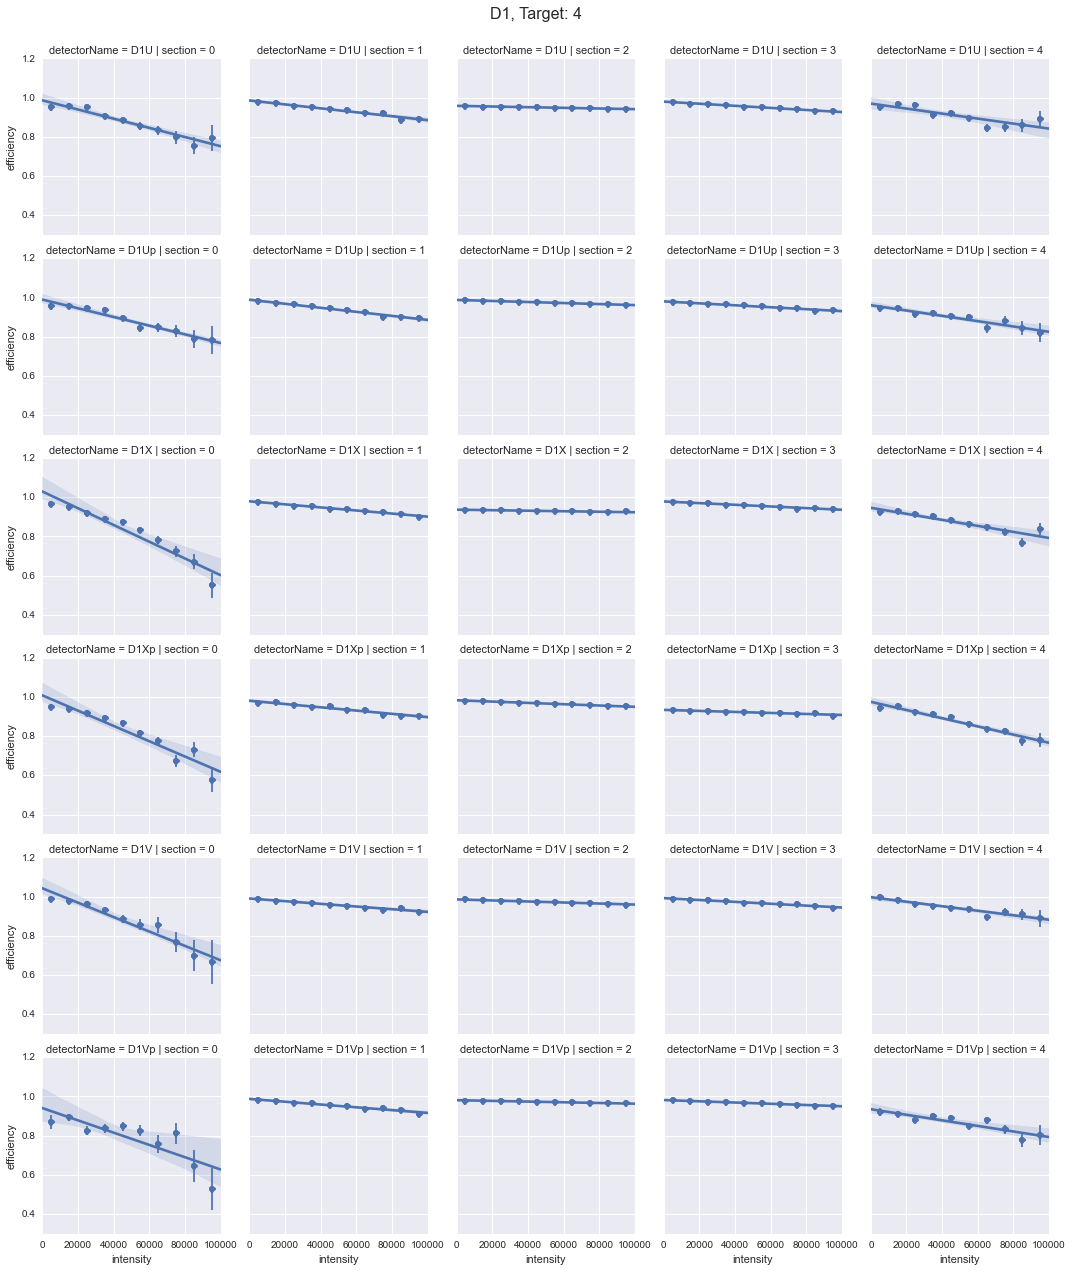

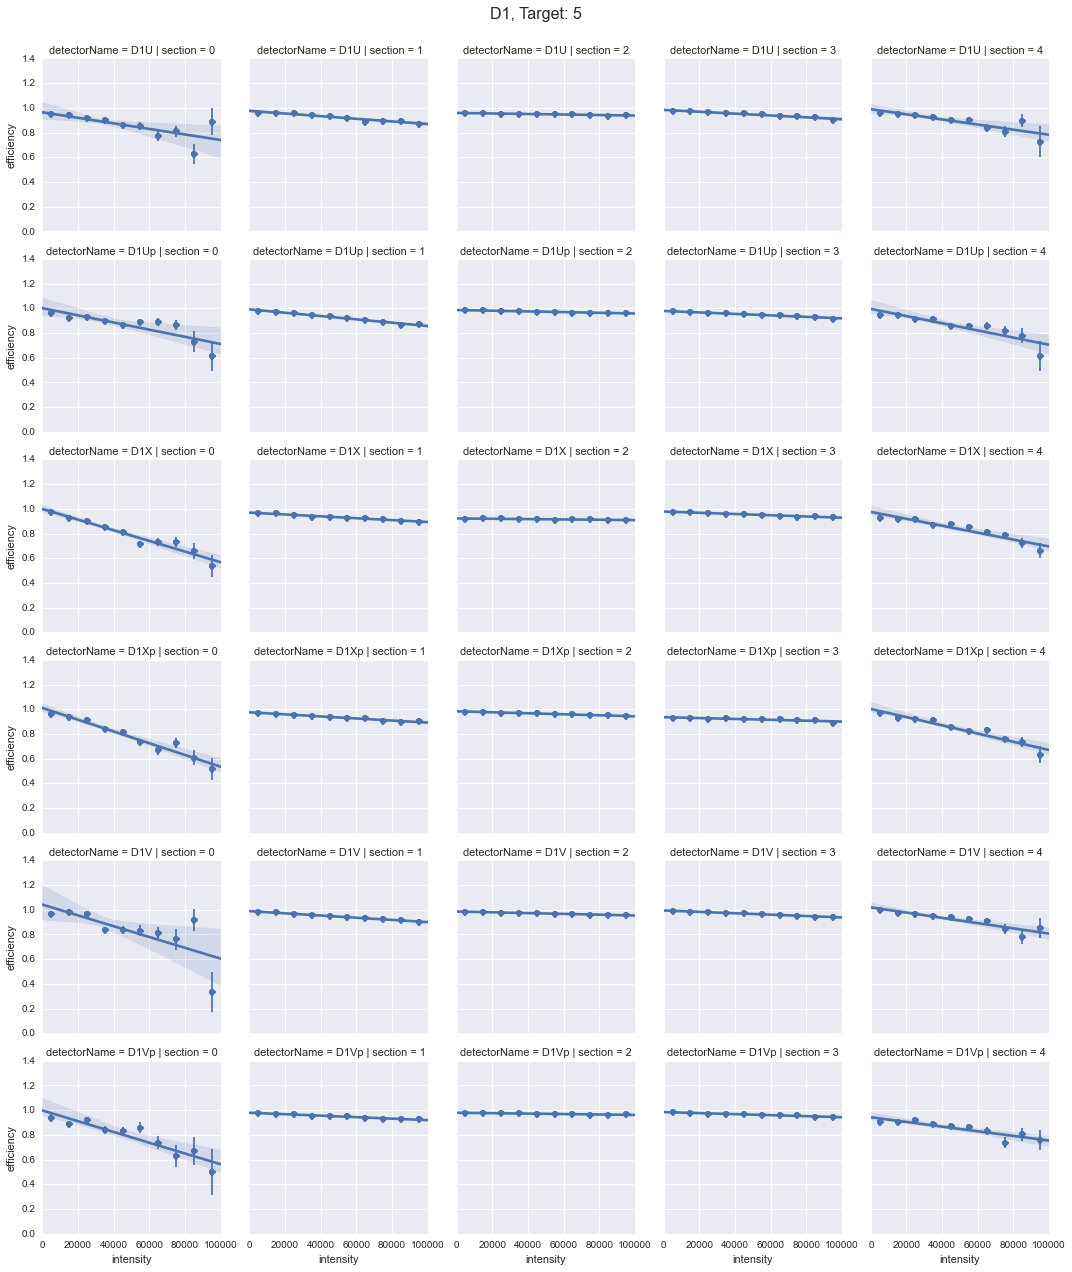

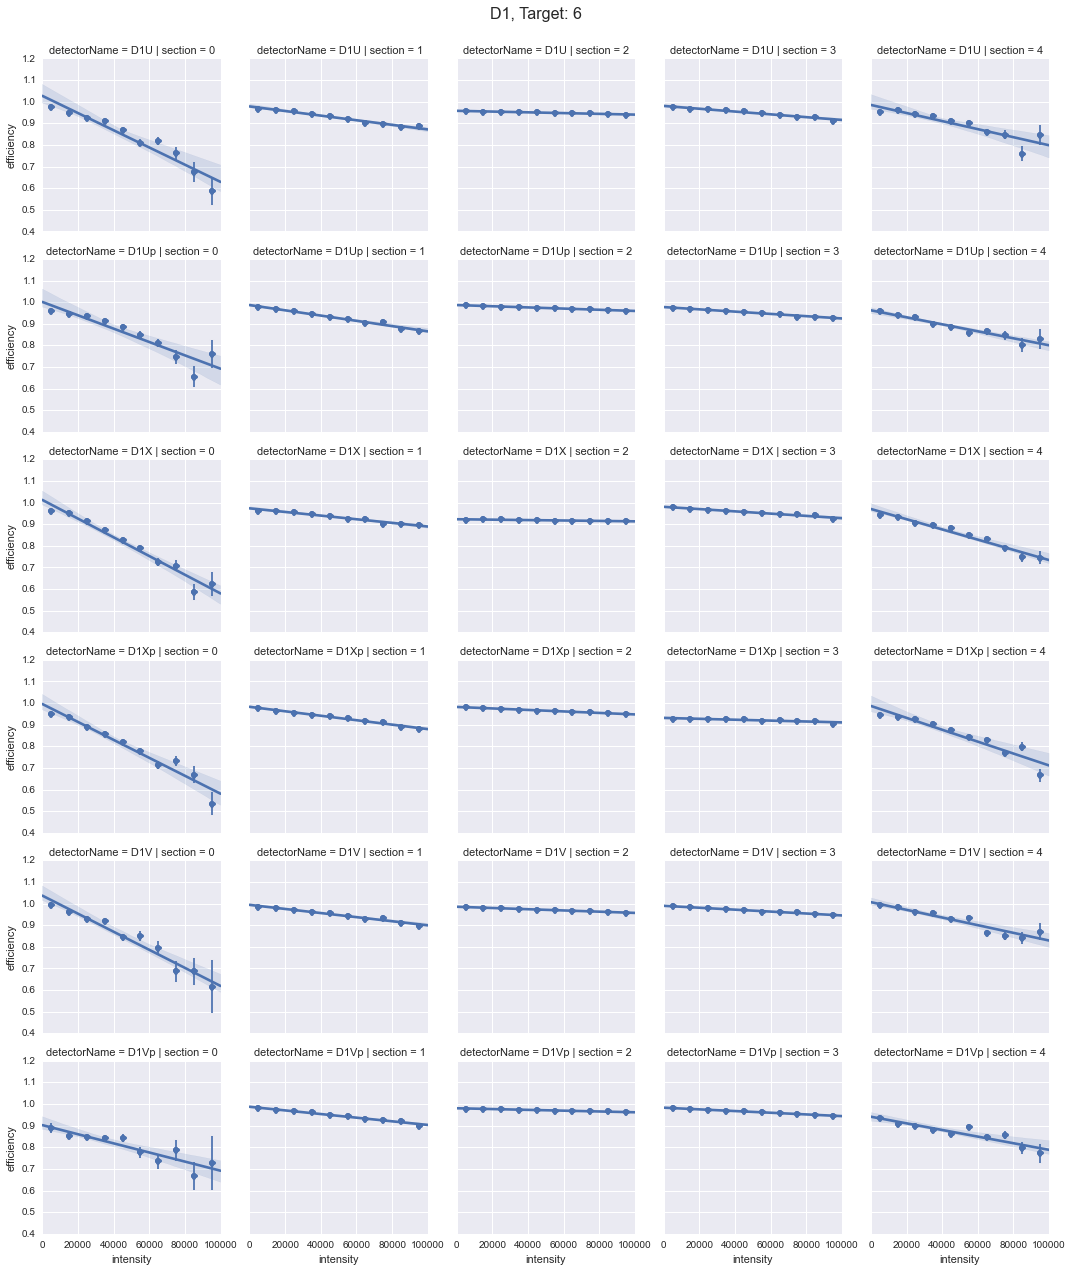

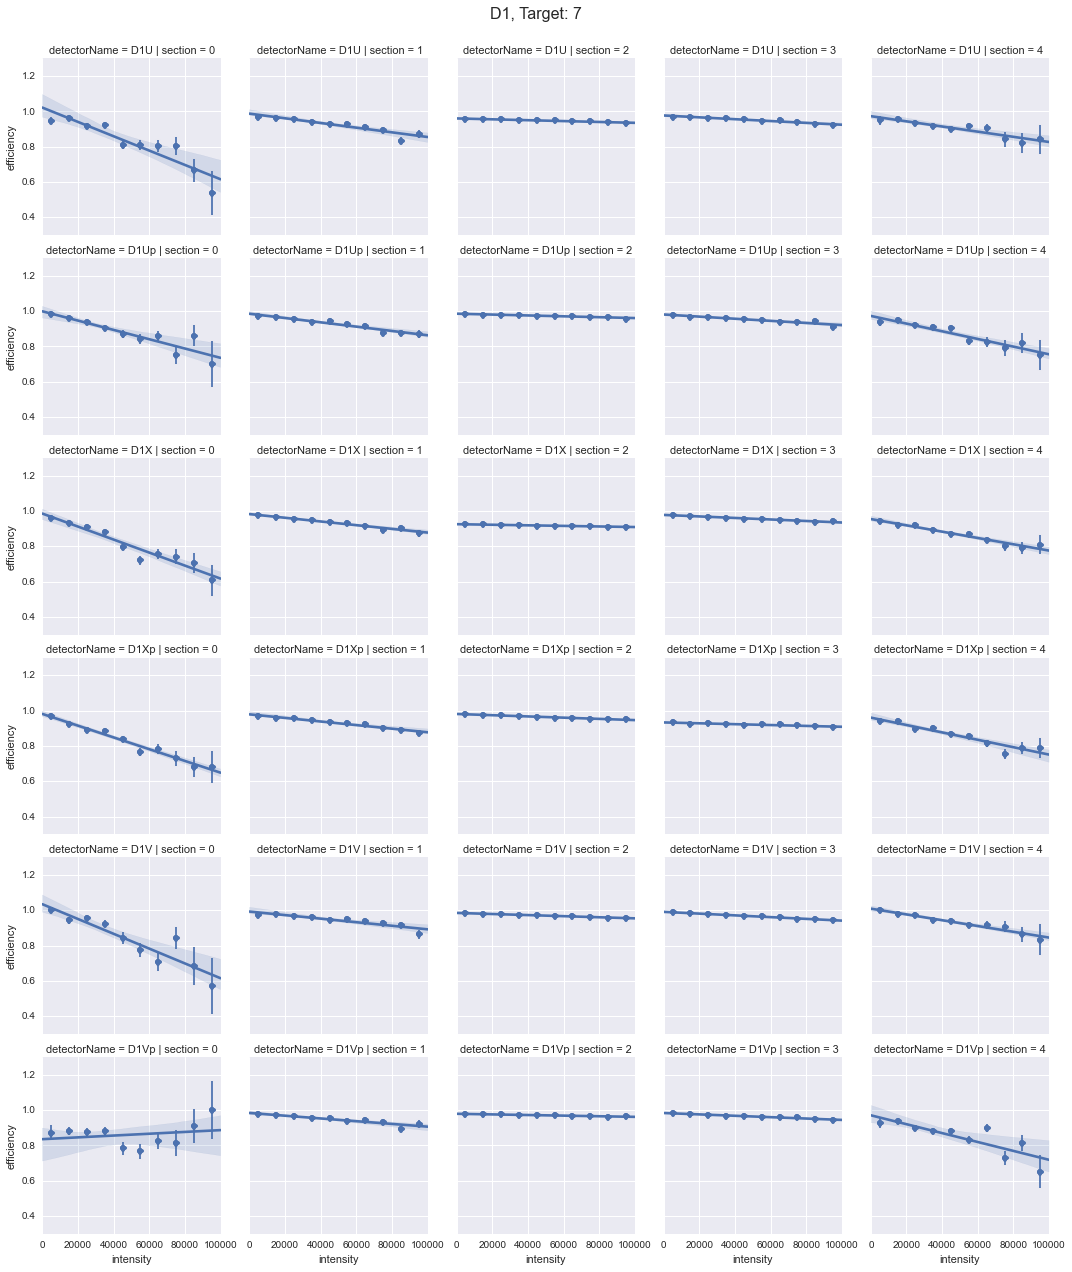

In [41]:
detector_list = ("D1U", "D1Up", "D1X", "D1Xp", "D1V", "D1Vp")
for i in xrange(1,8):
    g = sns.FacetGrid(chamber_eff.query('detectorName in @detector_list and target==@i'),
                      row='detectorName', col='section')
    g.map(sns.regplot, 'intensity', 'efficiency')
    g.map(plt.errorbar, 'intensity', 'efficiency', 'uncertainty', fmt='o')
    plt.subplots_adjust(top=0.94)
    g.fig.suptitle('D1, Target: %d' % i, fontsize=16)
    plt.savefig('figures/D1_targ%d_eff.png' % i)

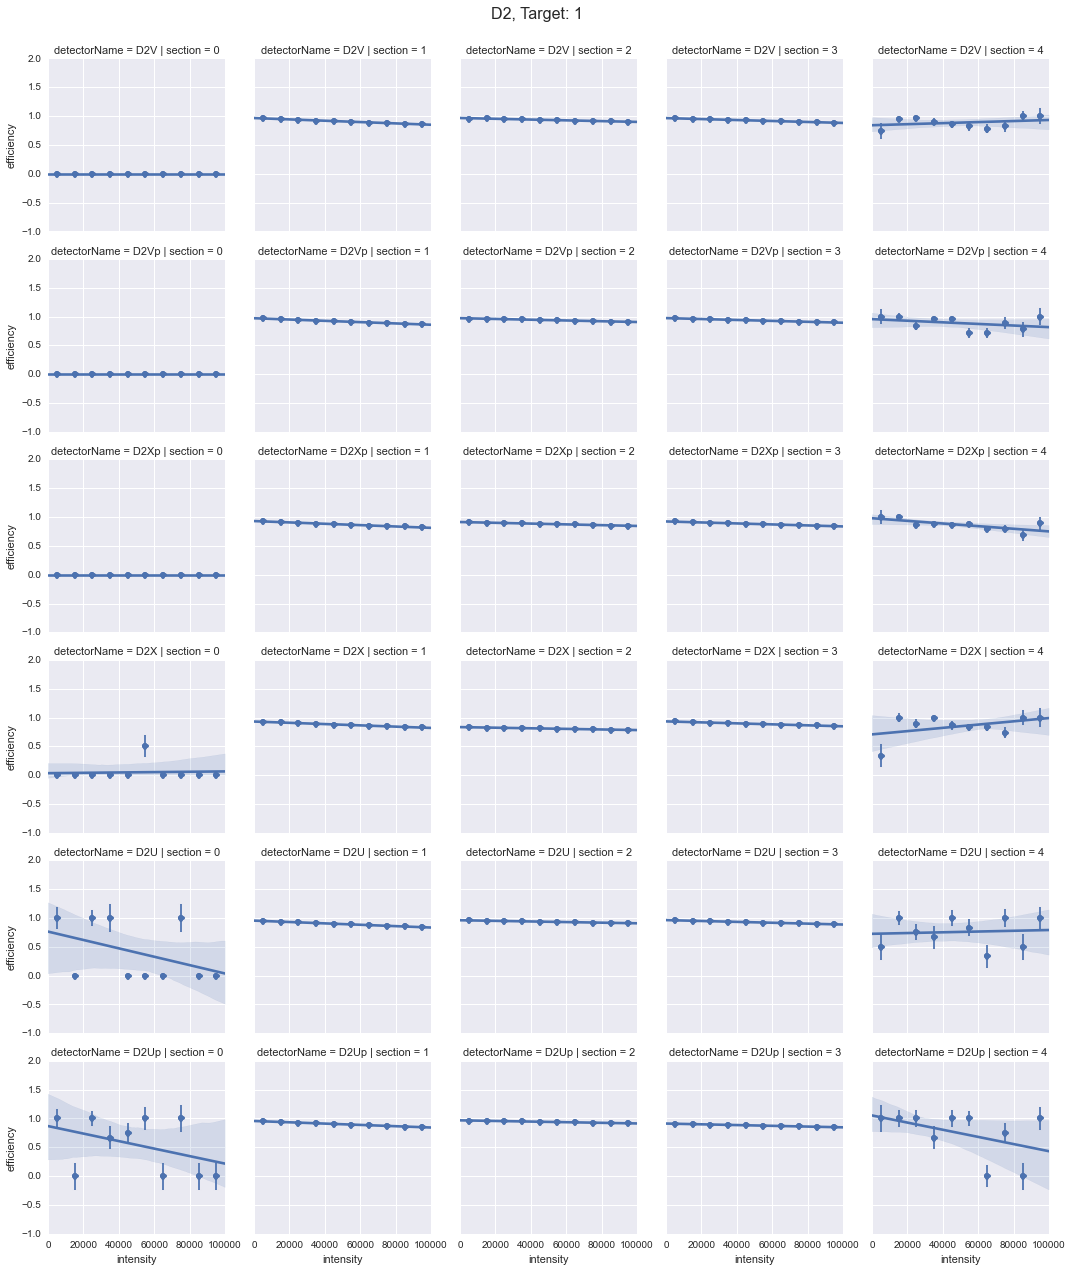

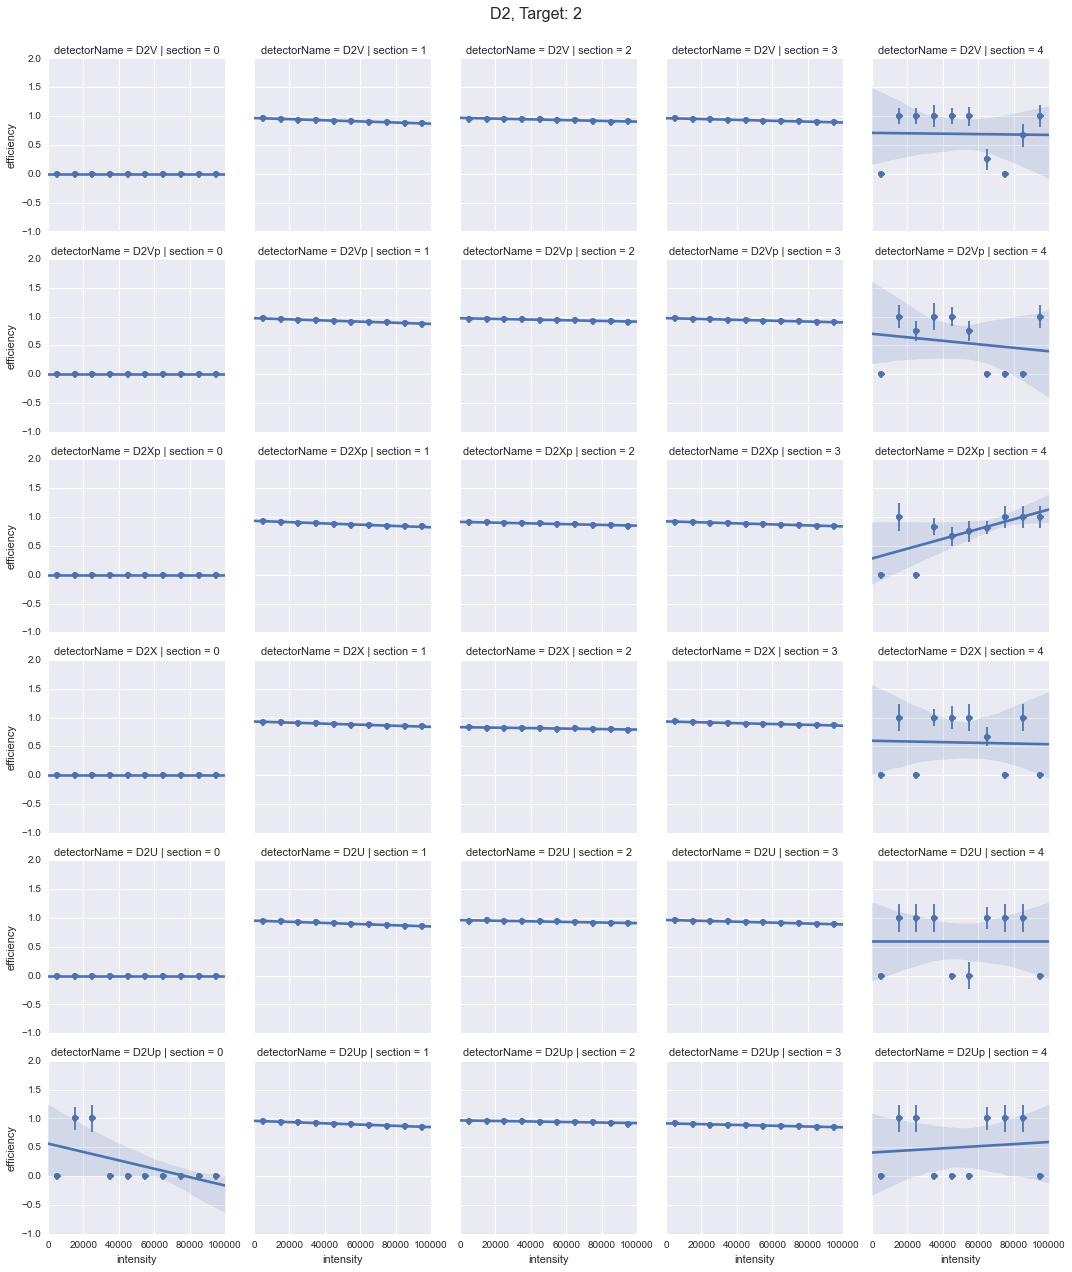

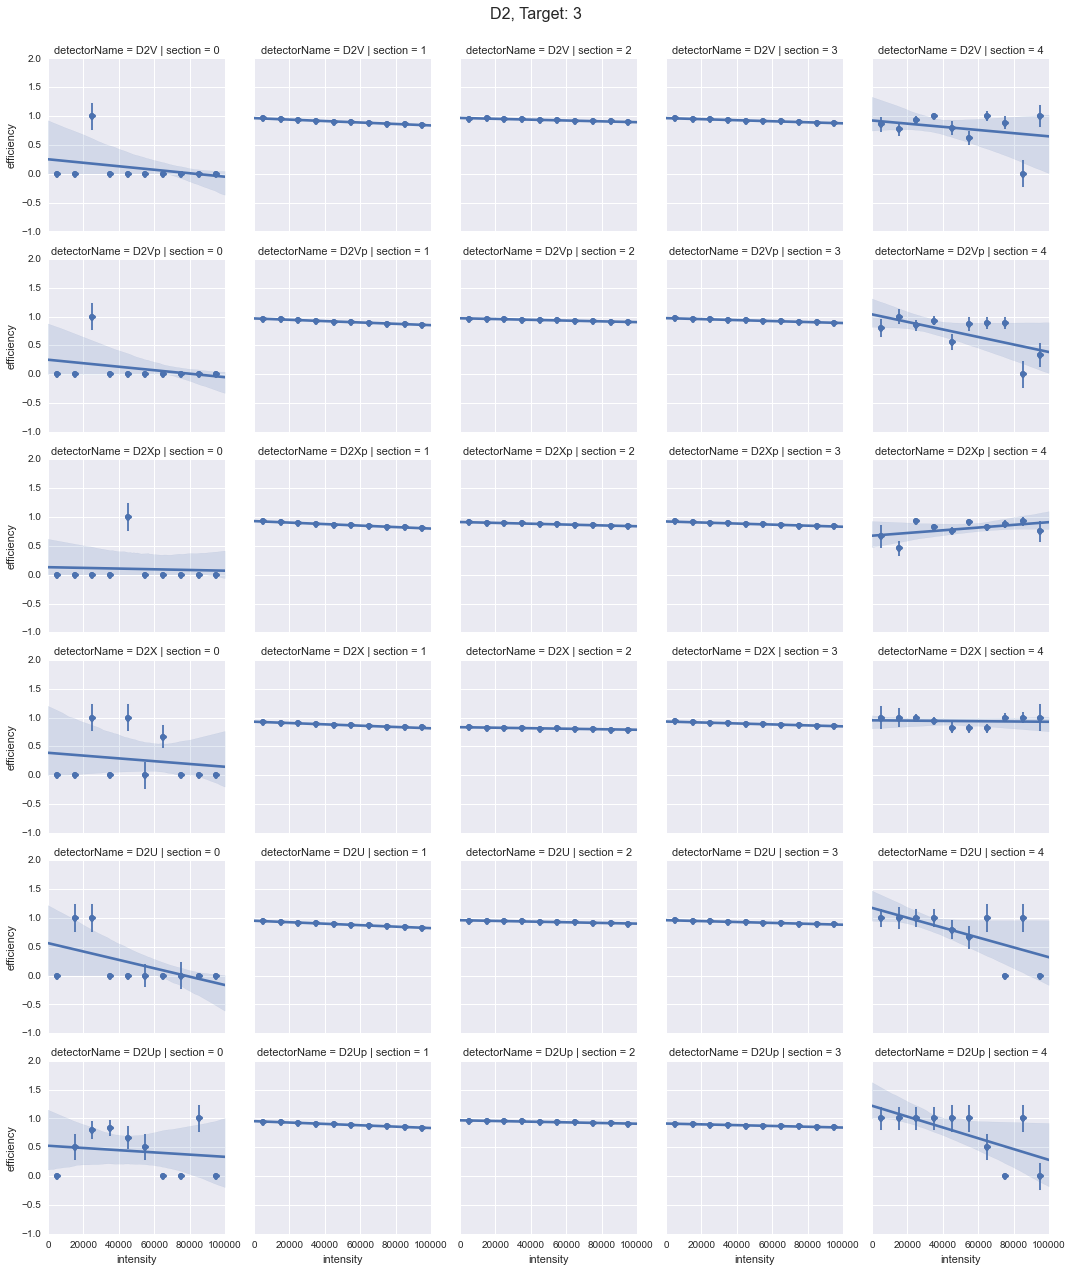

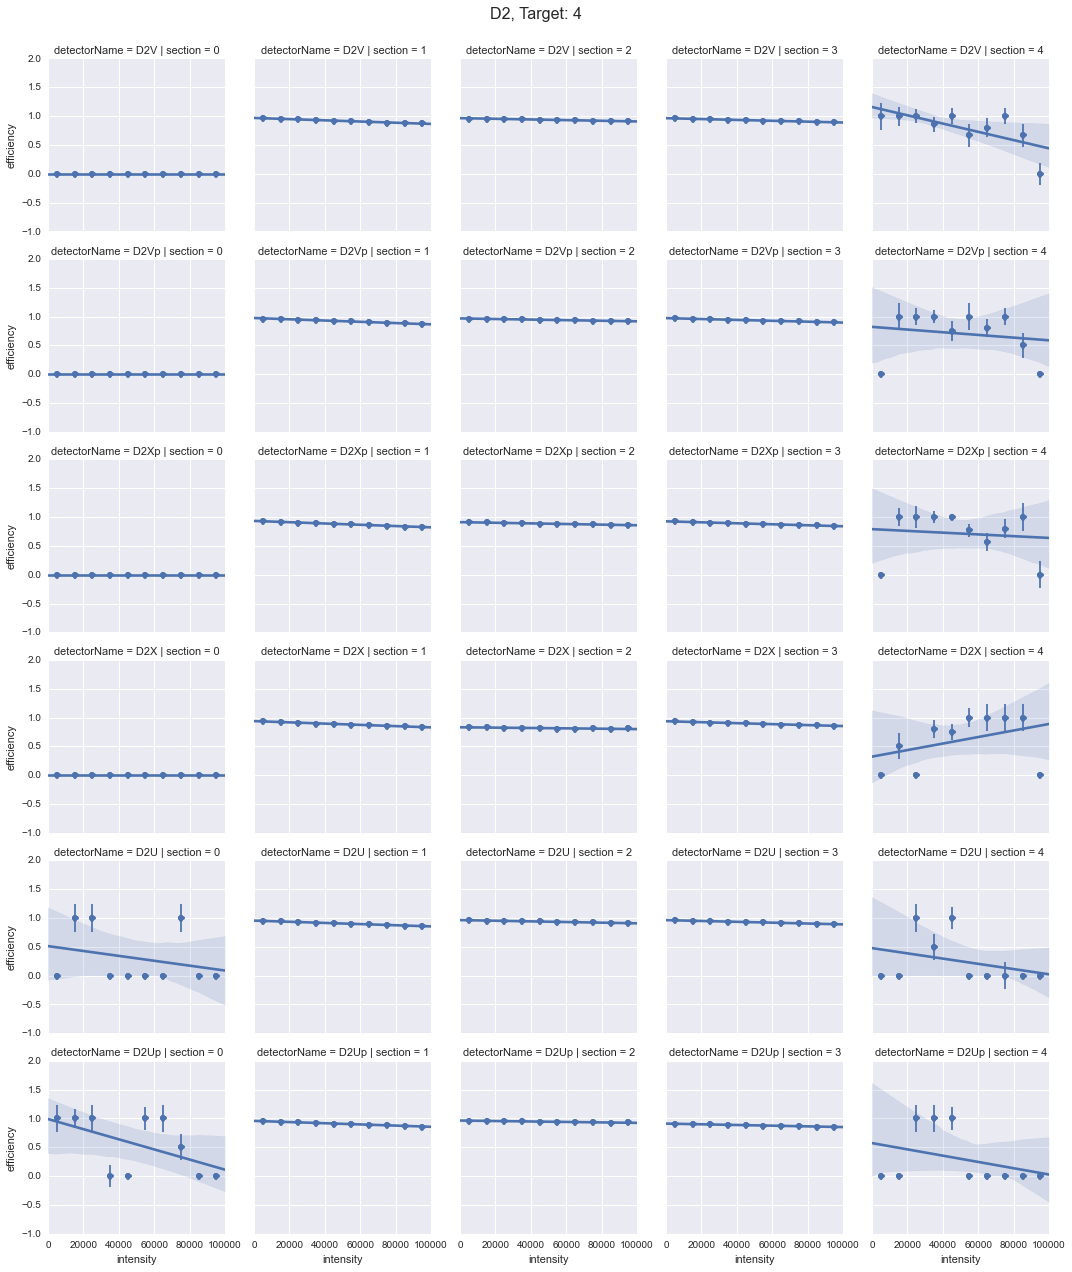

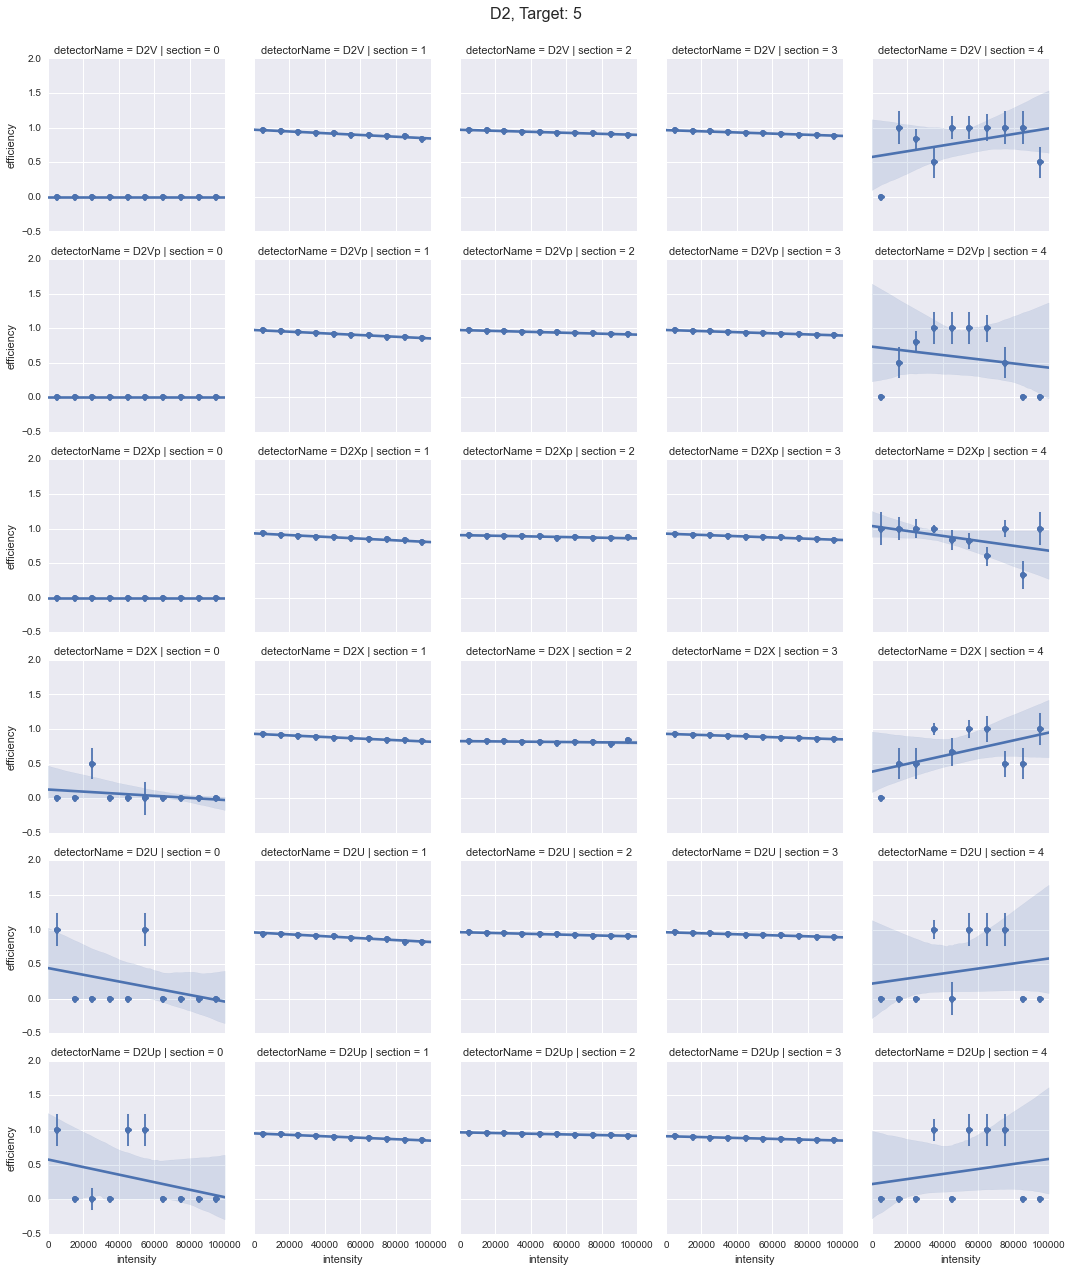

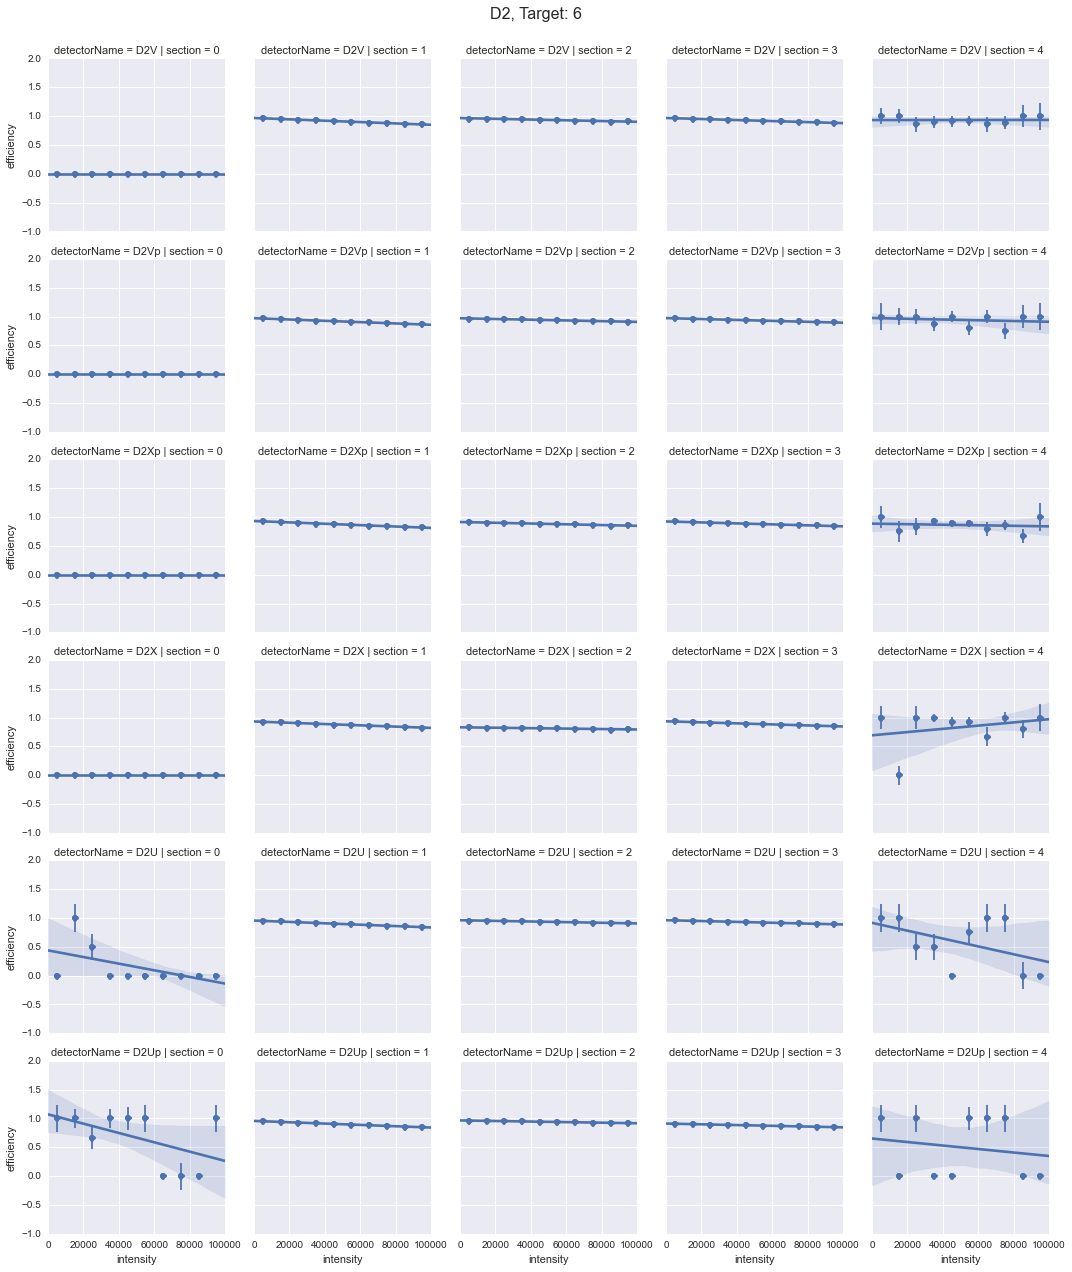

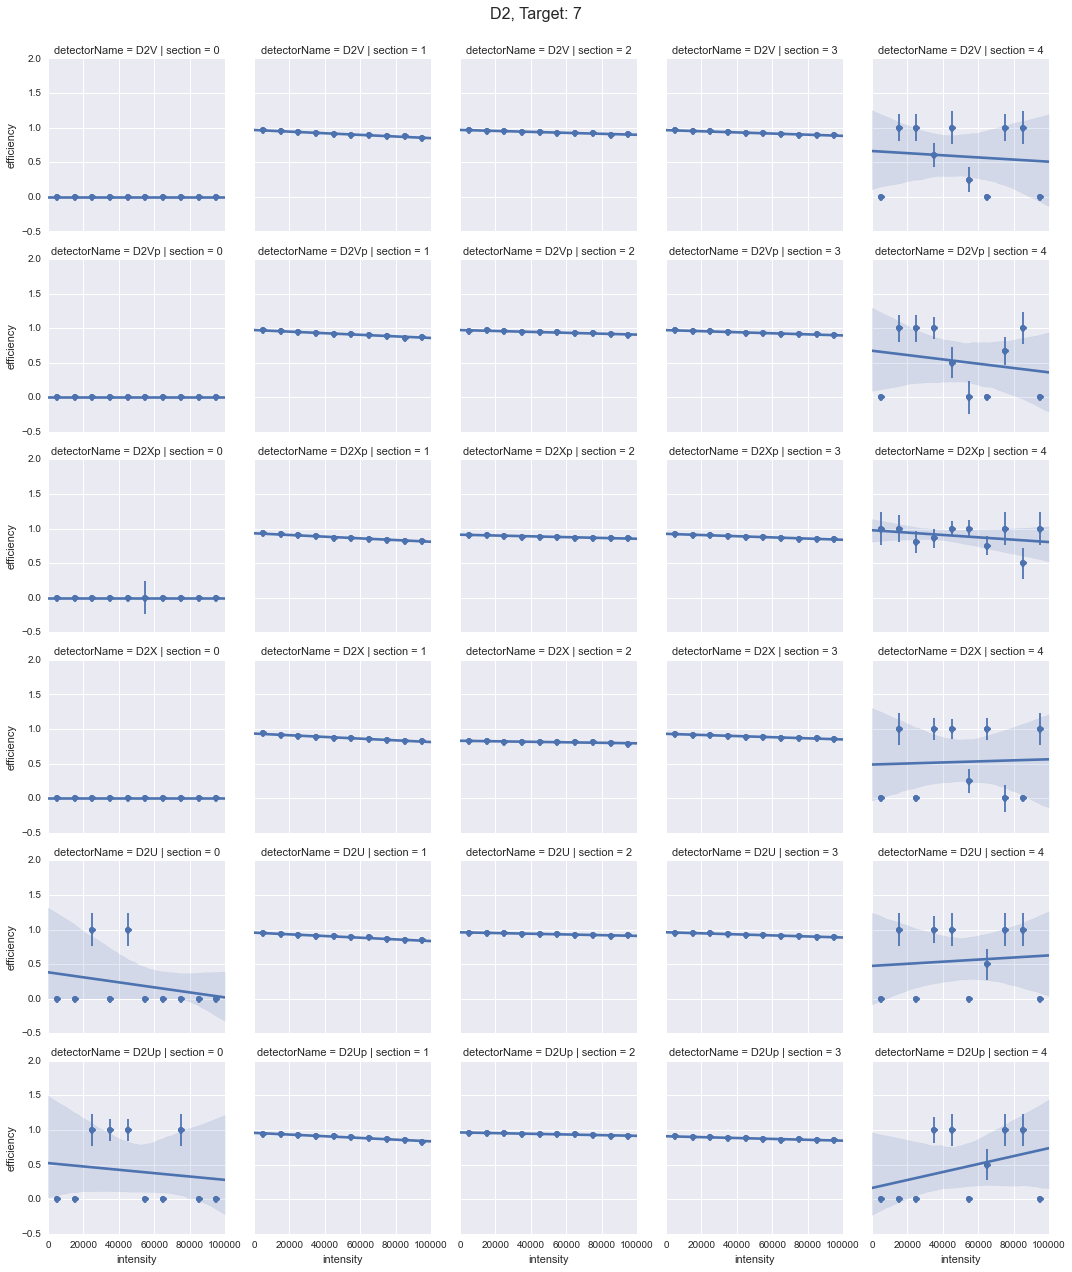

In [42]:
detector_list = ("D2U", "D2Up", "D2X", "D2Xp", "D2V", "D2Vp")
for i in xrange(1,8):
    g = sns.FacetGrid(chamber_eff.query('detectorName in @detector_list and target==@i'),
                      row='detectorName', col='section')
    g.map(sns.regplot, 'intensity', 'efficiency')
    g.map(plt.errorbar, 'intensity', 'efficiency', 'uncertainty', fmt='o')
    plt.subplots_adjust(top=0.94)
    g.fig.suptitle('D2, Target: %d' % i, fontsize=16)
    plt.savefig('figures/D2_targ%d_eff.png' % i)

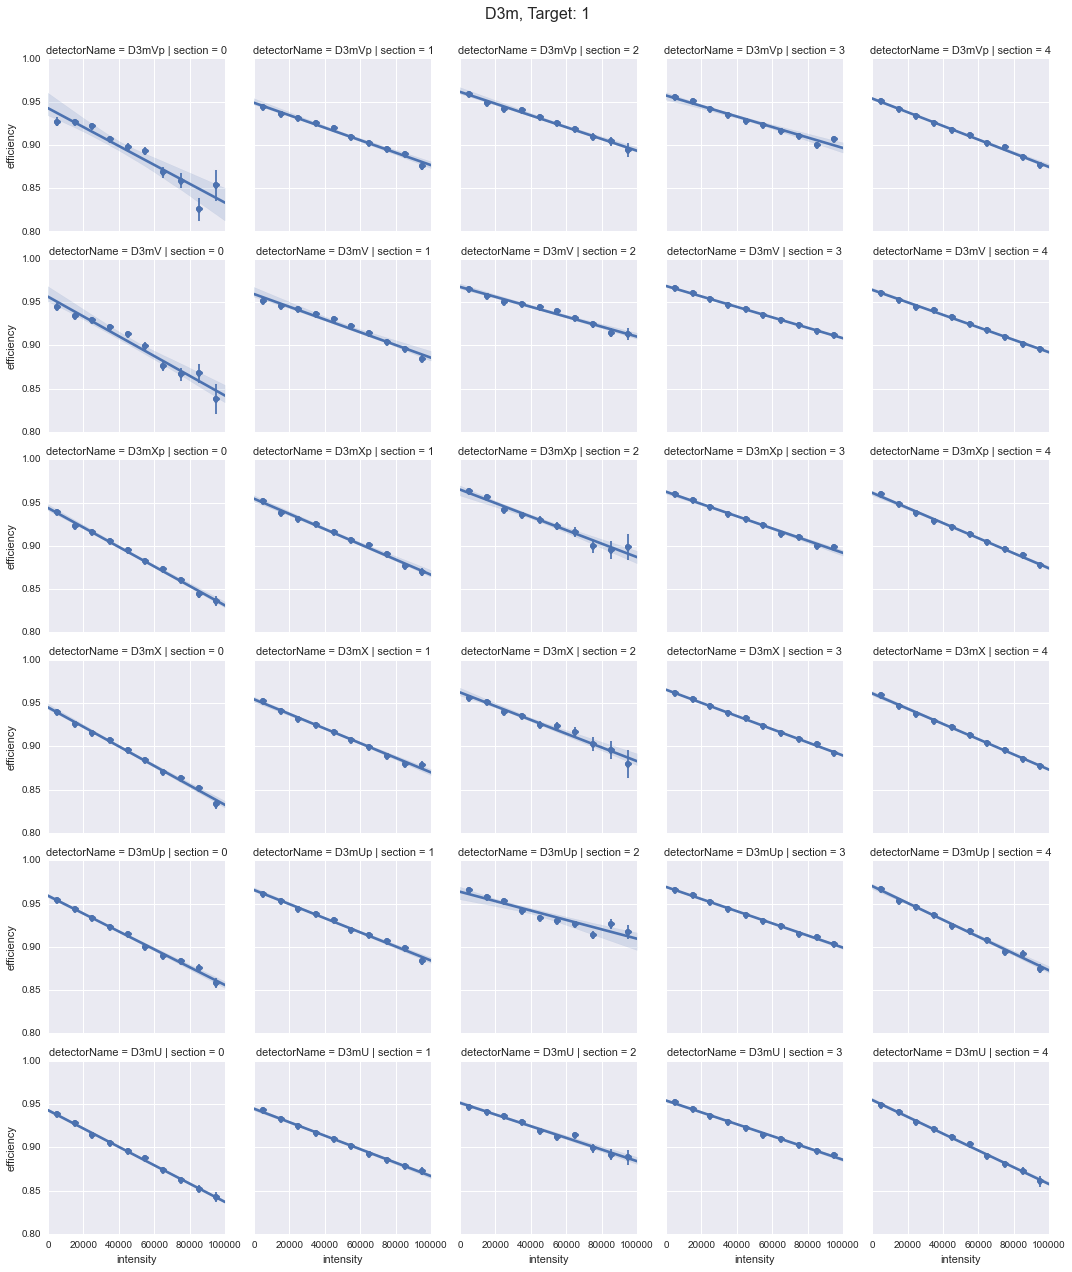

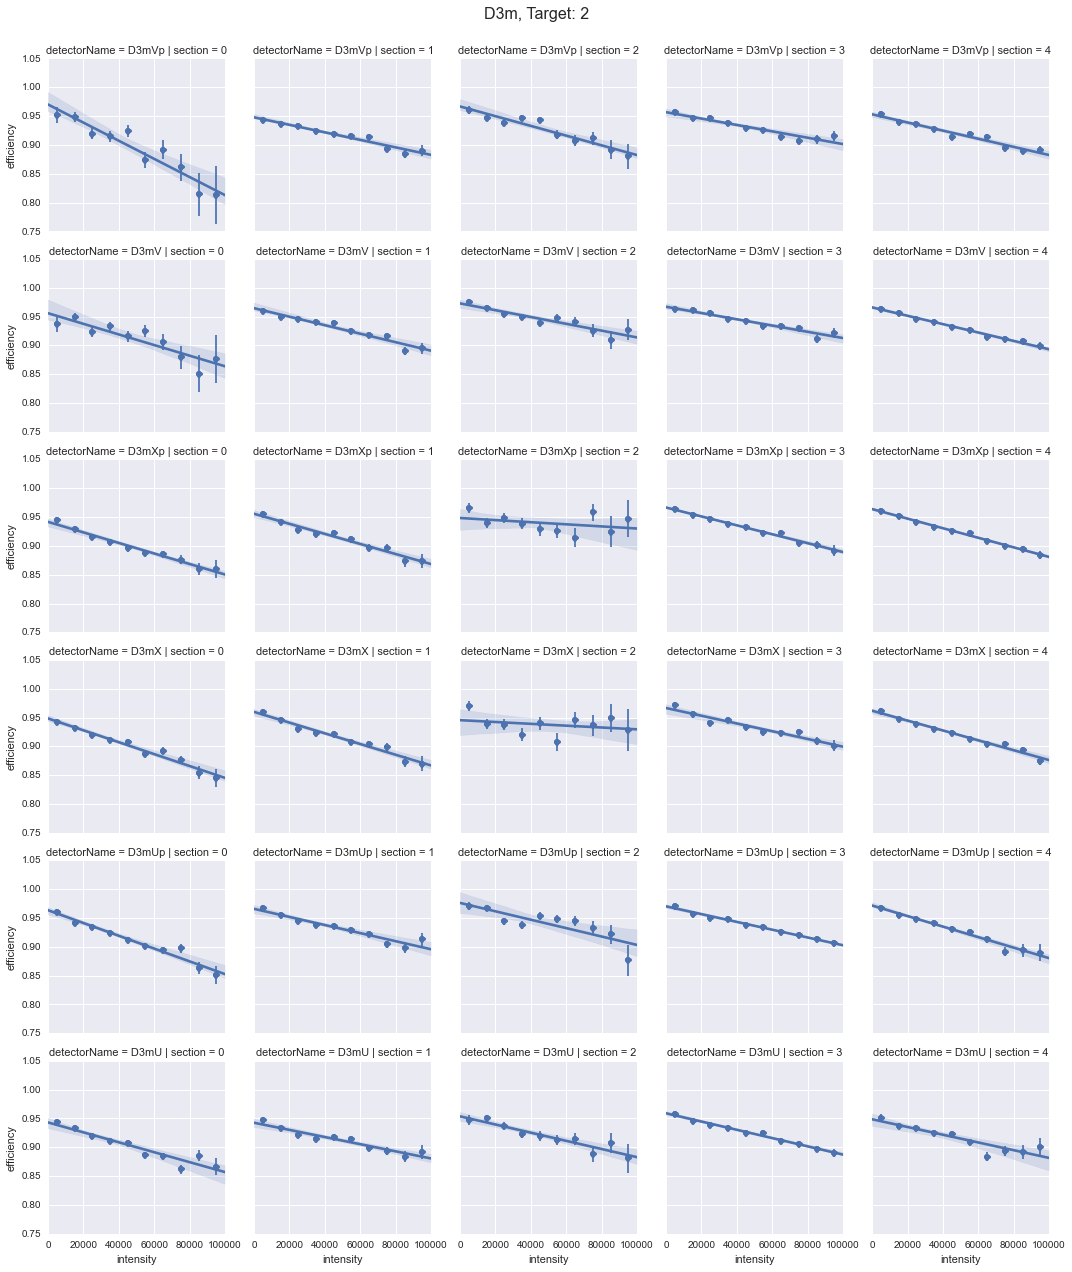

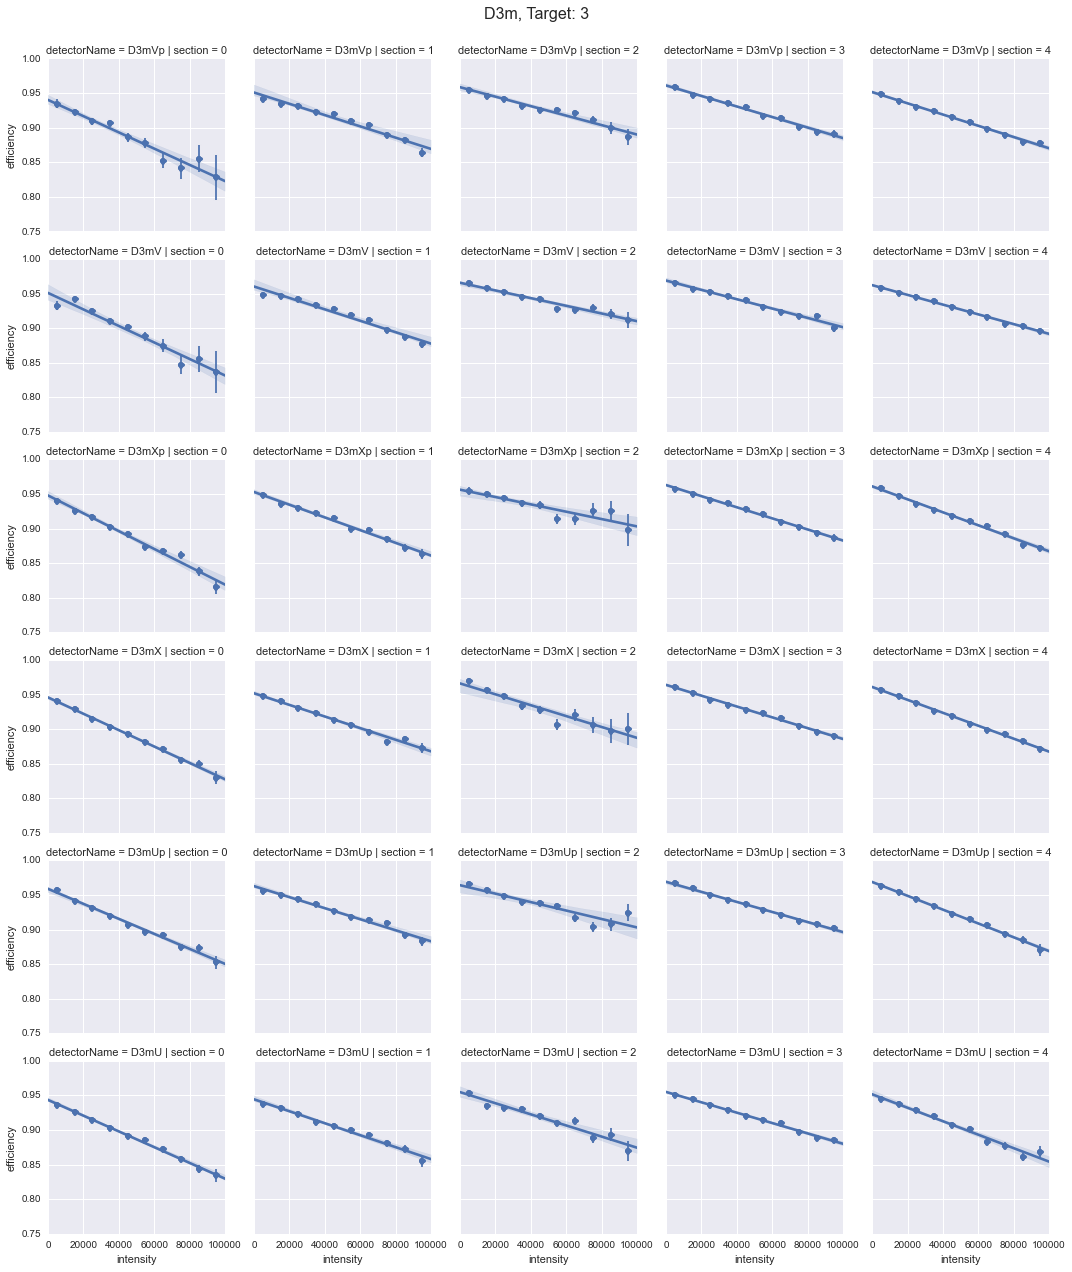

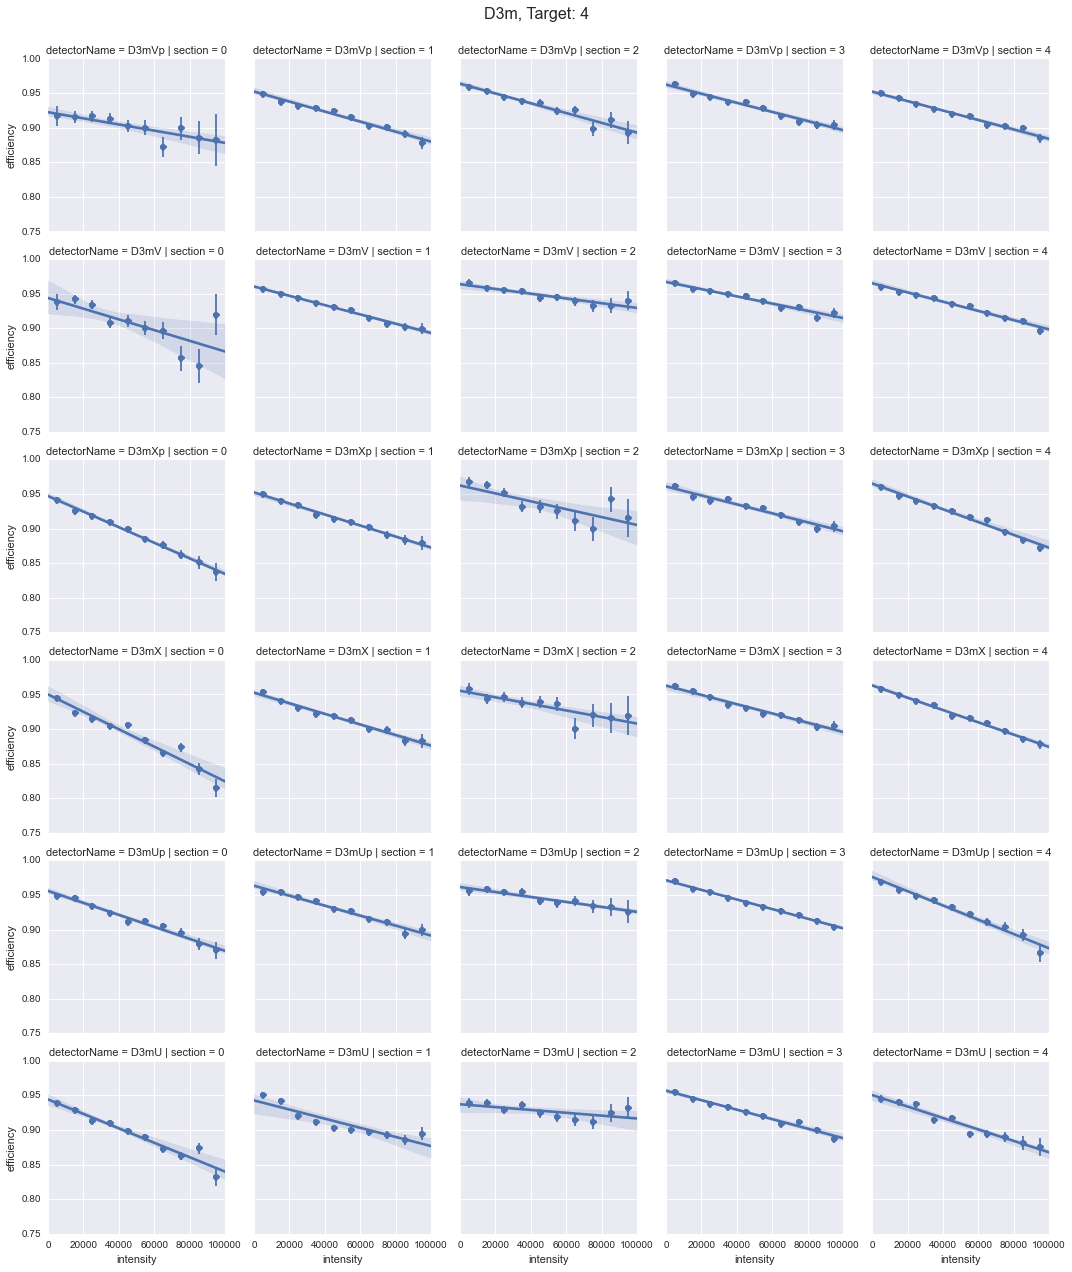

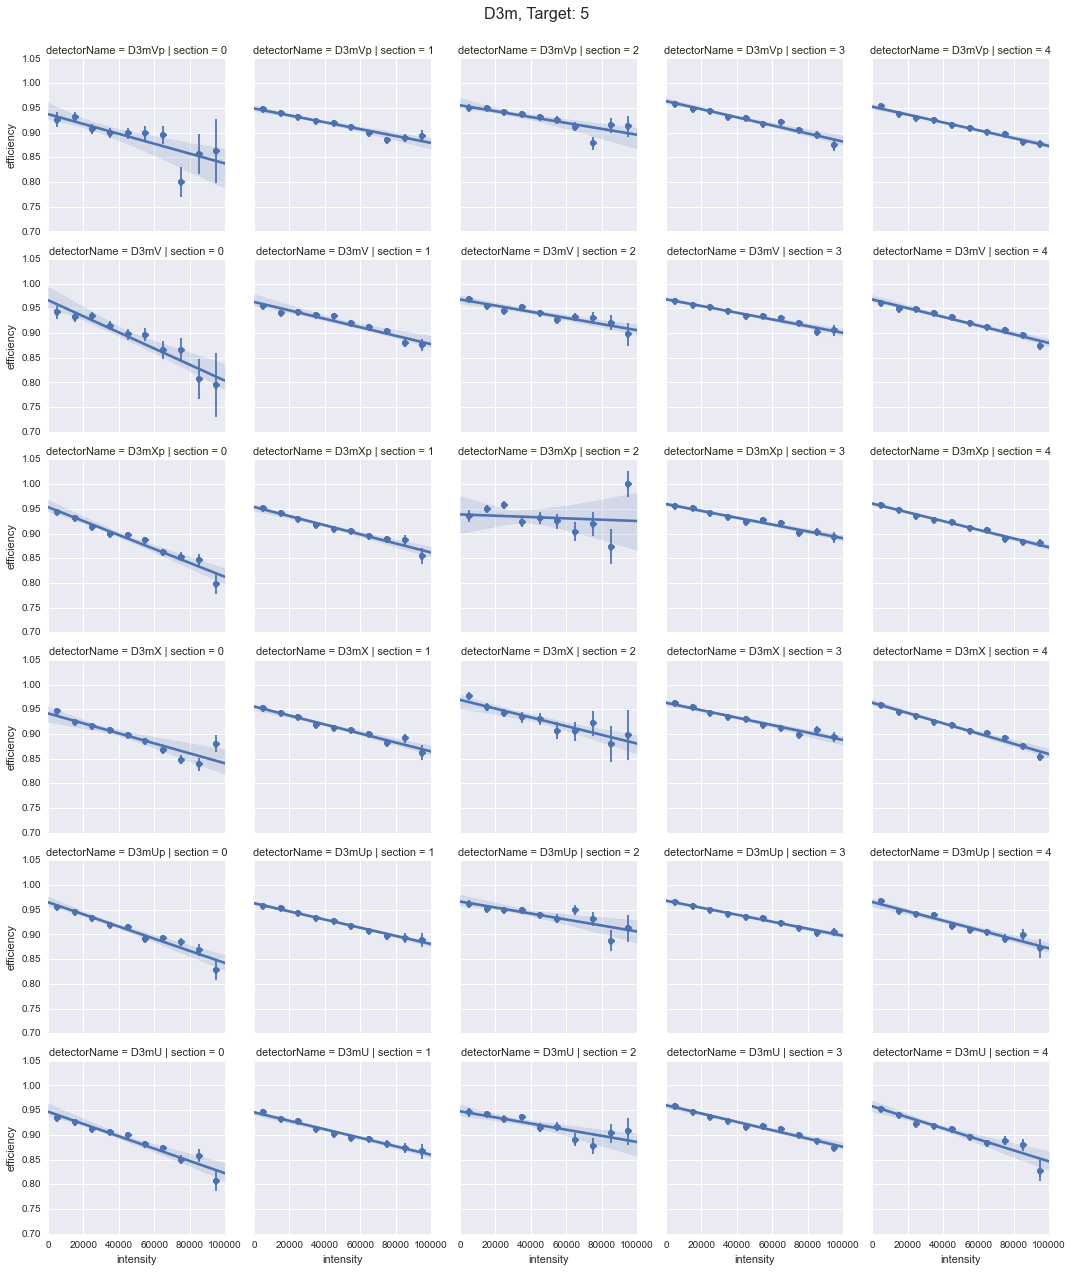

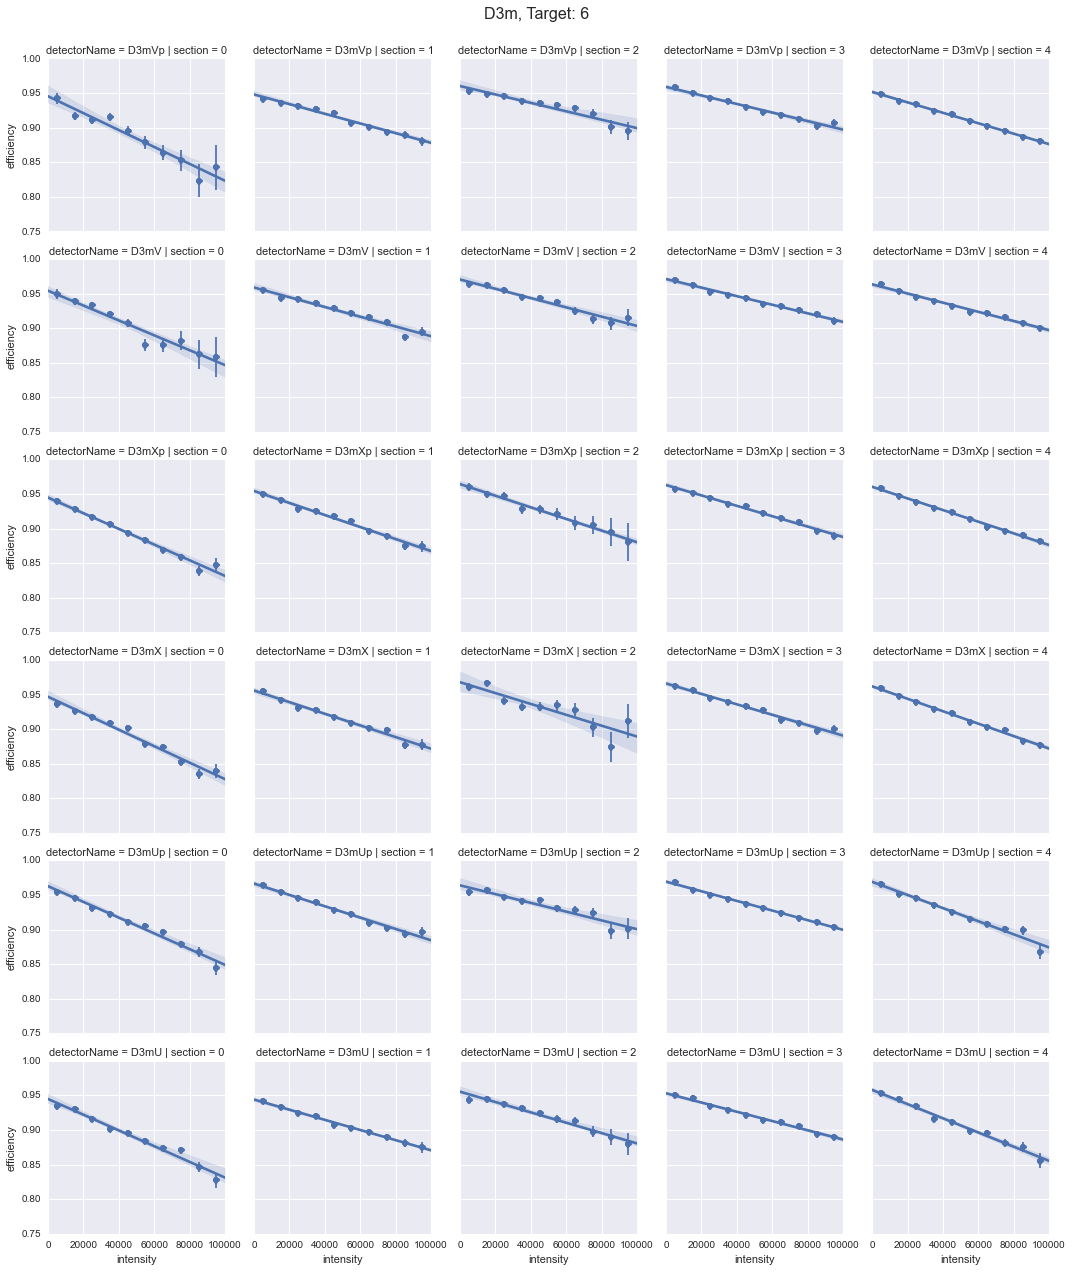

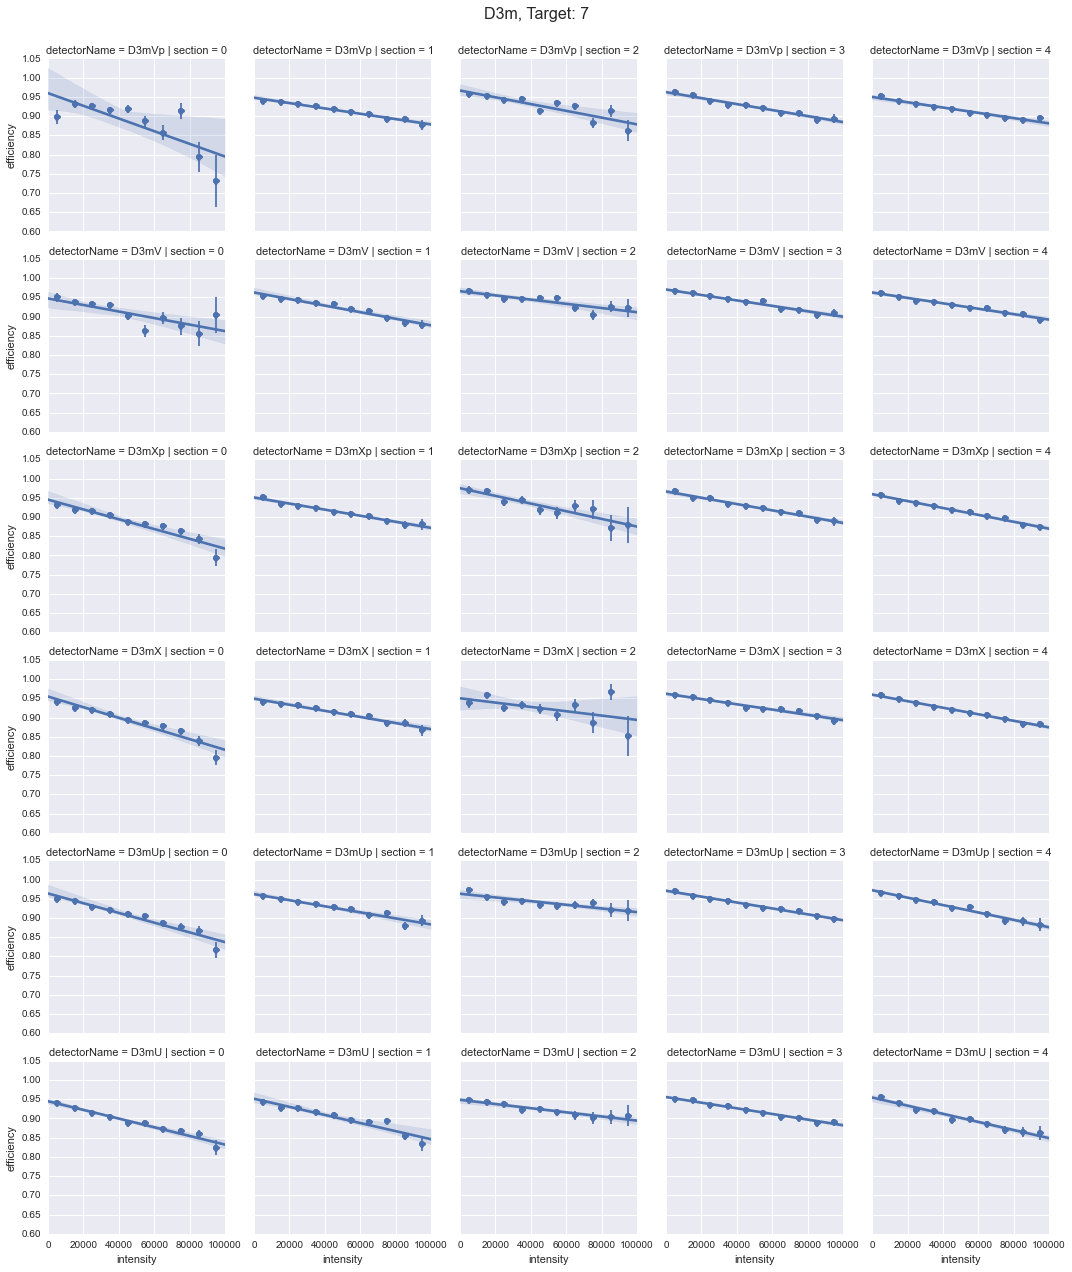

In [43]:
detector_list = ("D3mU", "D3mUp", "D3mX", "D3mXp", "D3mV", "D3mVp")
for i in xrange(1,8):
    g = sns.FacetGrid(chamber_eff.query('detectorName in @detector_list and target==@i'),
                      row='detectorName', col='section')
    g.map(sns.regplot, 'intensity', 'efficiency')
    g.map(plt.errorbar, 'intensity', 'efficiency', 'uncertainty', fmt='o')
    plt.subplots_adjust(top=0.94)
    g.fig.suptitle('D3m, Target: %d' % i, fontsize=16)
    plt.savefig('figures/D3m_targ%d_eff.png' % i)

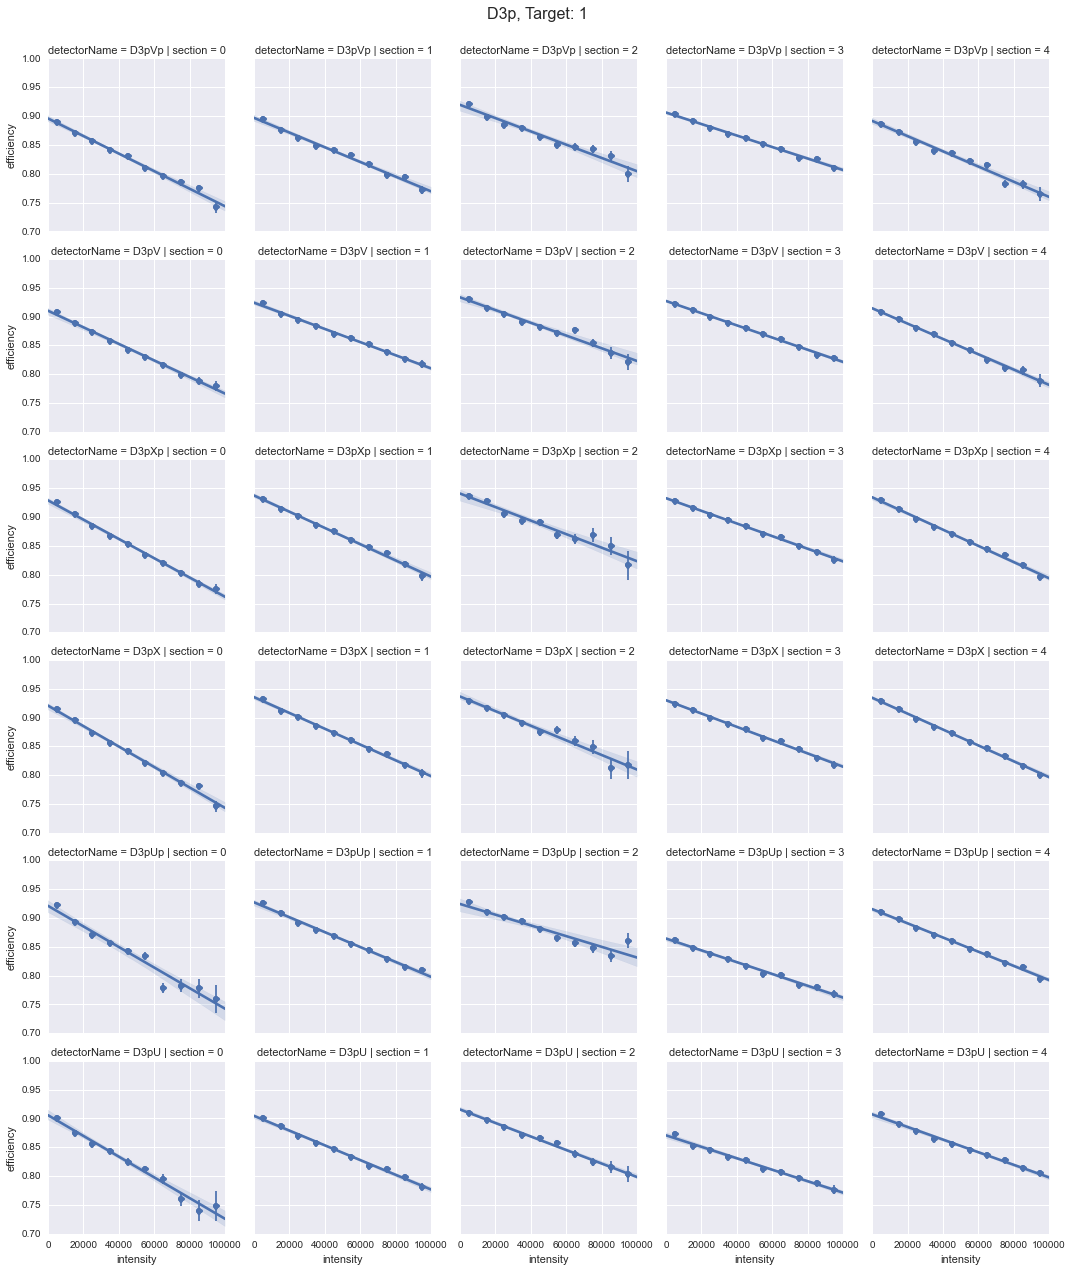

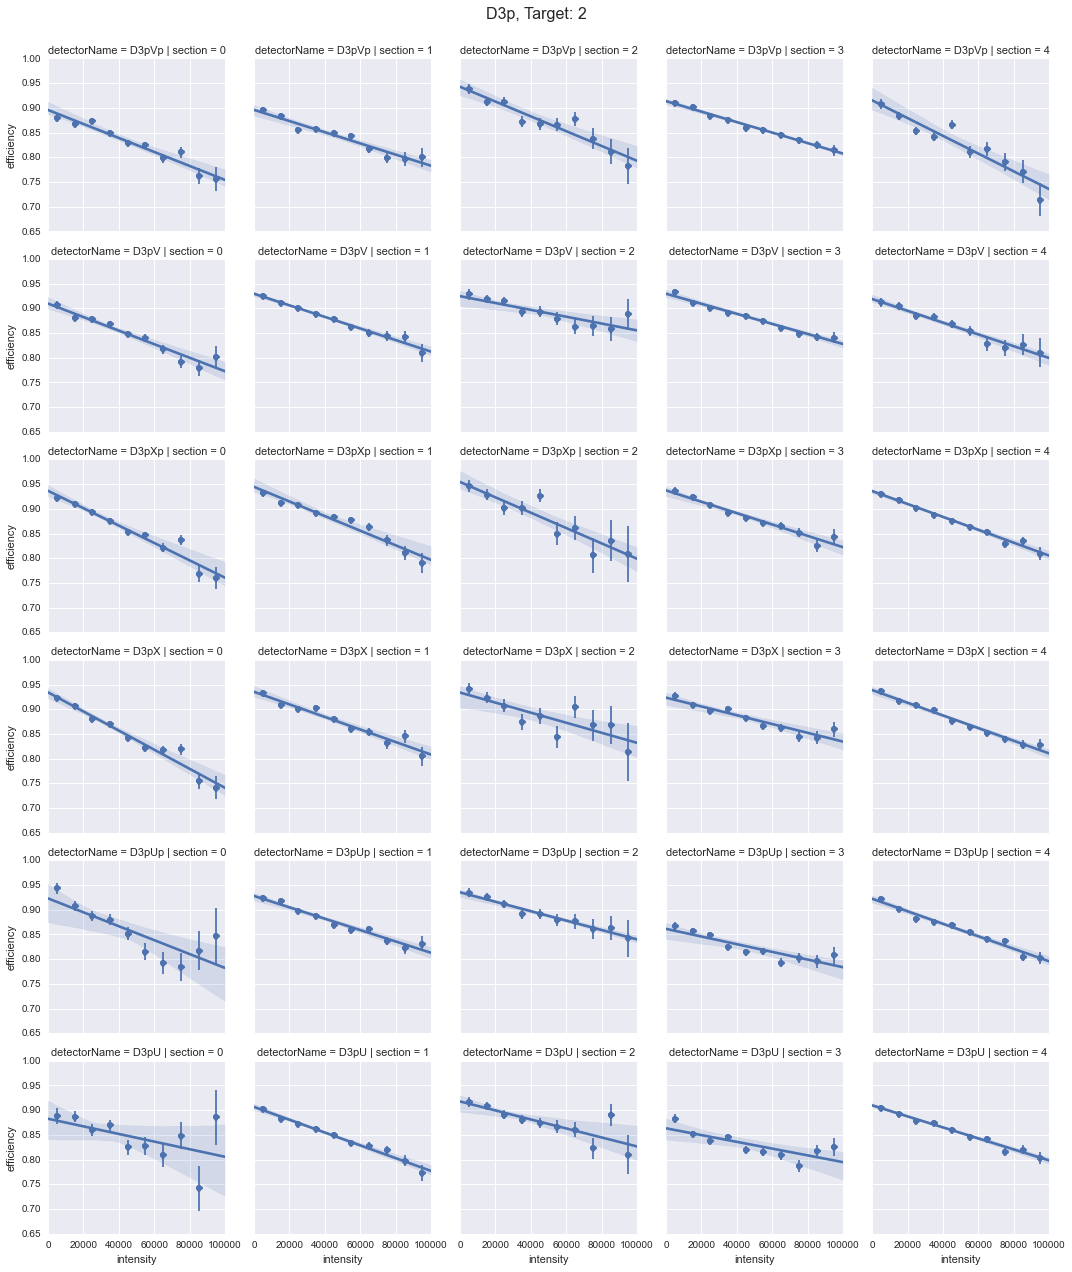

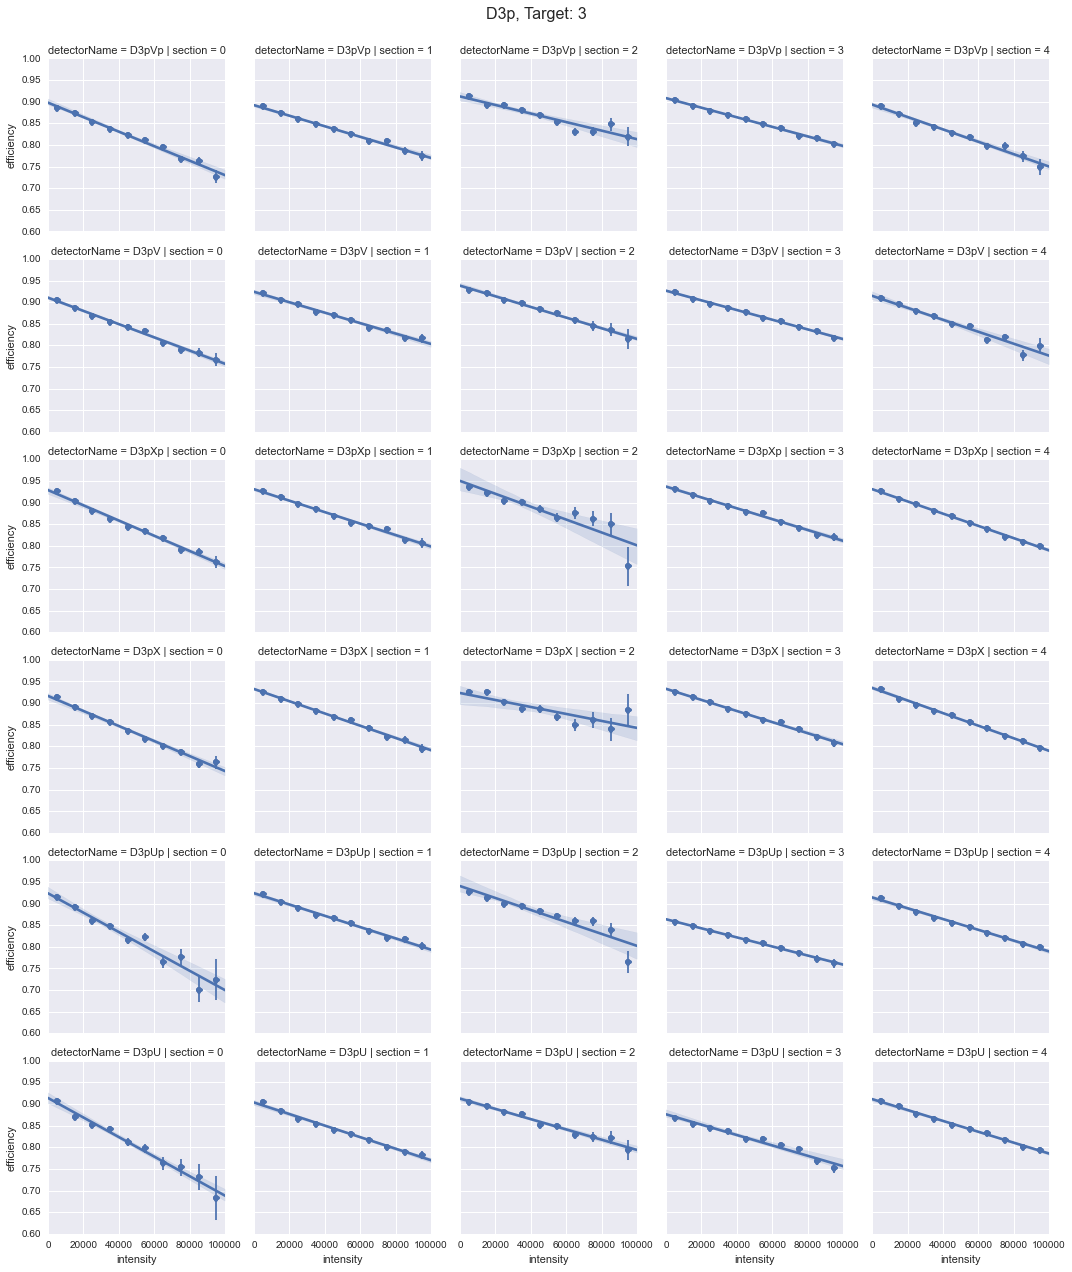

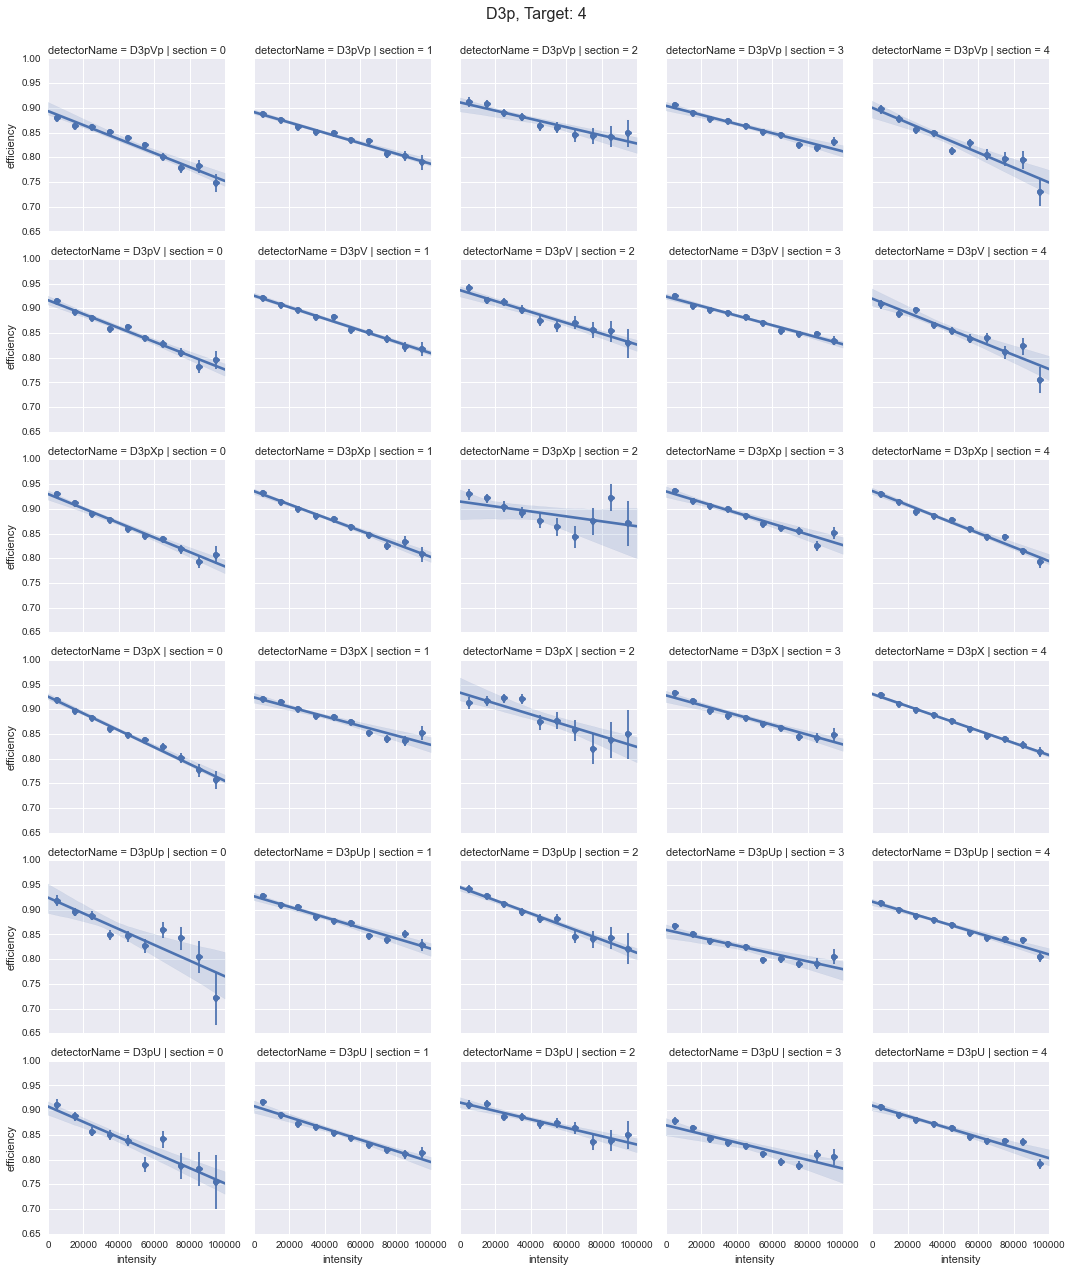

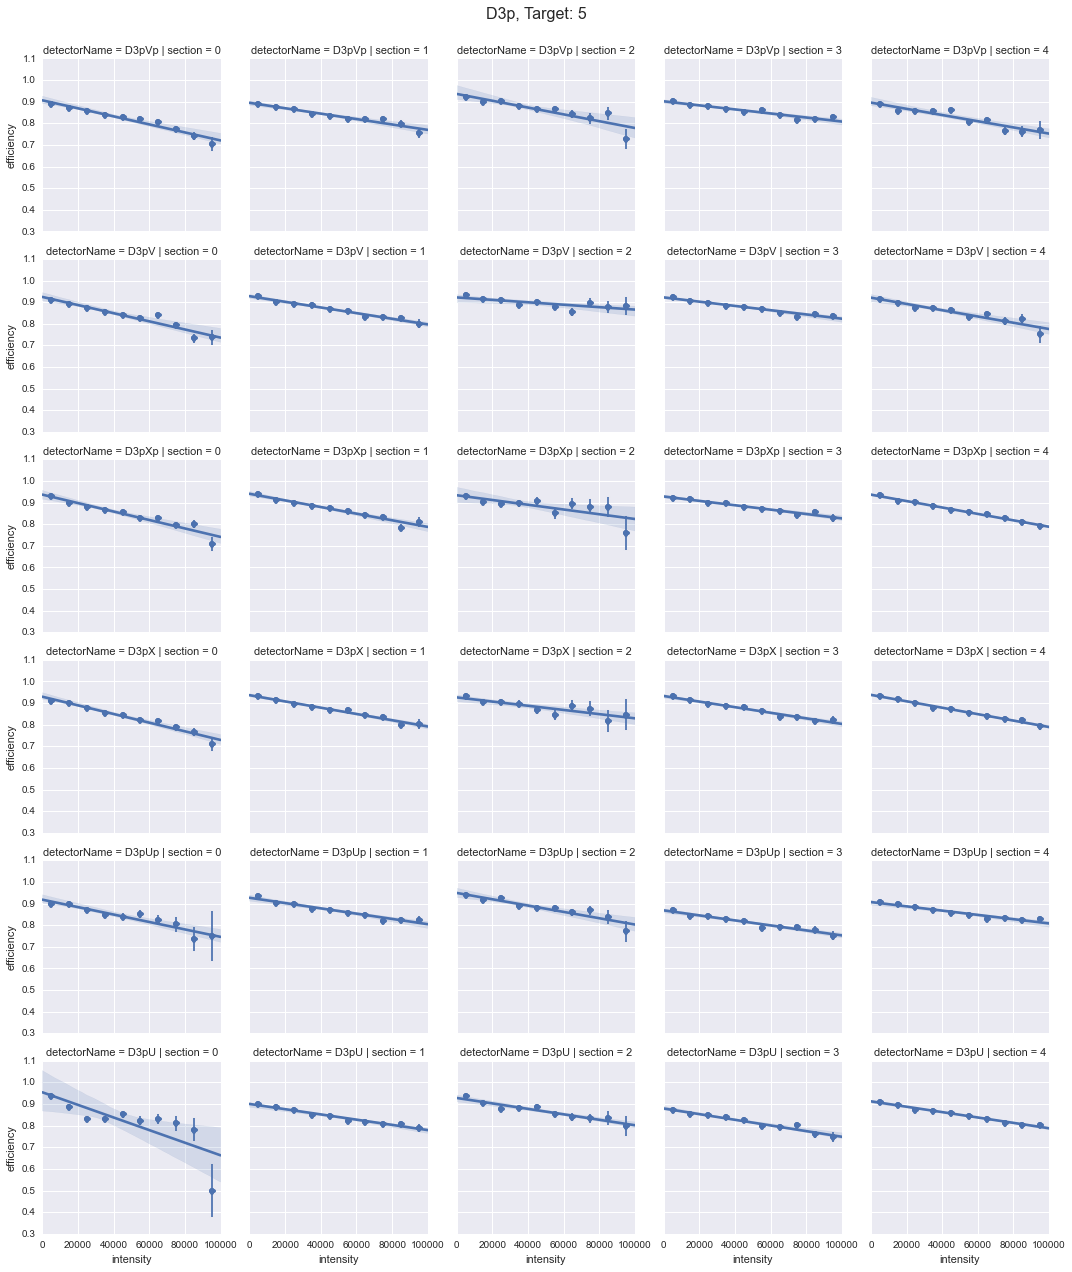

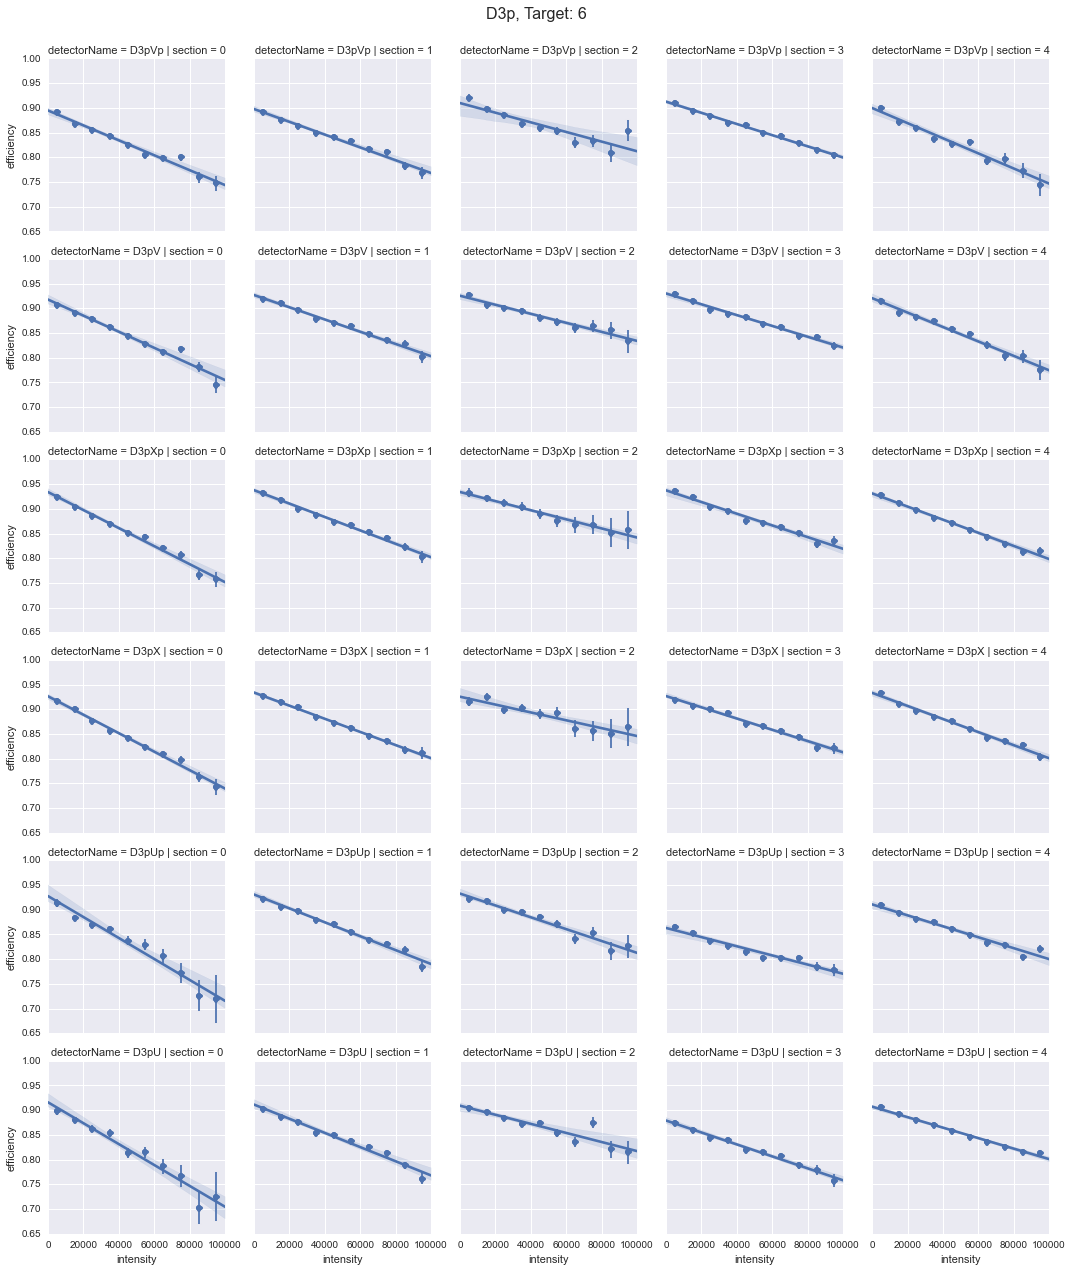

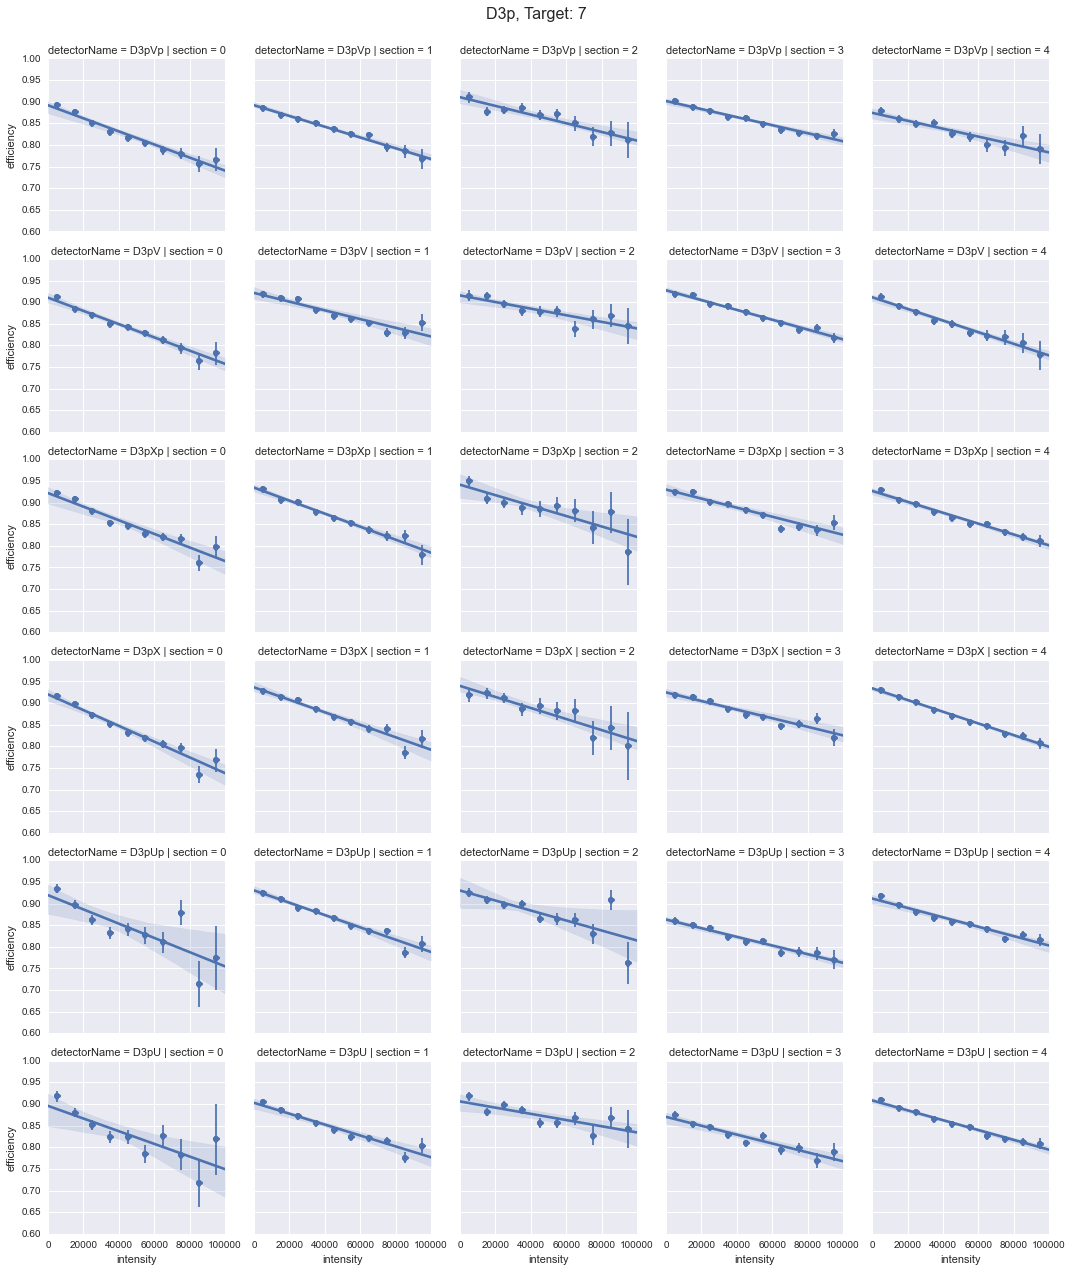

In [44]:
detector_list = ("D3pU", "D3pUp", "D3pX", "D3pXp", "D3pV", "D3pVp")
for i in xrange(1,8):
    g = sns.FacetGrid(chamber_eff.query('detectorName in @detector_list and target==@i'),
                      row='detectorName', col='section')
    g.map(sns.regplot, 'intensity', 'efficiency')
    g.map(plt.errorbar, 'intensity', 'efficiency', 'uncertainty', fmt='o')
    plt.subplots_adjust(top=0.94)
    g.fig.suptitle('D3p, Target: %d' % i, fontsize=16)
    plt.savefig('figures/D3p_targ%d_eff.png' % i)

# Procedure

### For each roadID in the roadset, determine the efficiency of a track passing through that road.

1. Find all the paddles associated with a road
2. Find the central wire for each plane that's masked by each hodoscope paddle
3. Simulate a track going through that road by throwing a random number against all the efficiencies of all 18 planes
4. Test to see if the hits that made it would have constituted a track
5. Report these 'roadID' track efficiencies for each intensity bin

# Functions

* **get_mean_wires_from_hodo(stationID, detectorHalf, elementID)**: Each paddle corresponds to a range of wireElementID's in each plane it shares a stationID with. Find the middle elementID of that range.
* **get_mean_wires_from_road(roadID)**: Get each paddle for a given roadID. Call the above function to find the mean wireElementID's for all 18 planes in for the roadID.
* **get_efficiency(plane, element, intensity)**: For a given plane, for a given wireElementID, for a given intensity, return the efficiency and the uncertainty in that efficiency.
* **test_track(hits)**: Take a set of detectors and their hits and test against "good track" criteria to see if it passes all criteria.
* **road_test(roadID, intensity, N)**: For a given roadID and intensity, fetch the efficiencies (and their uncertainties) for all corresponding planes. Then, generate random numbers for each plane to simulate "hits" in the planes. Test of the track would have been "good". Do this N times and use the number of "good" tracks to compute the "track efficiency".
* **road_efficiency_study(N)**: Test every roadID for every intensity setting N times and spit out the track efficiency for each (roadID, intensity) setting.

In [16]:
def get_mean_wires_from_hodo(stationID, detectorHalf, elementID):
    # Bottom-half only corresponds to D3 minus
    # Top-half only corresponds to D3 plus
    det_dict = {'B' : ("D3pU", "D3pUp", "D3pV", "D3pVp", "D3pX", "D3pXp"),
                'T' : ("D3mU", "D3mUp", "D3mV", "D3mVp", "D3mX", "D3mXp")}
    query = ("""hodoDetectorName == \"H%d%s\" and \
                hodoElementID==%d and \
                wireDetectorName not in @det_dict[@detectorHalf]""" %
             (stationID, detectorHalf, elementID))
    df = (hodo_mask
             .query(query)
             [['wireDetectorName', 'wireElementID']]
             .groupby('wireDetectorName')
             .mean()
             .round()
             .reset_index())
    return df

In [17]:
def get_mean_wires_from_road(roadID):
    hodos = (trigger_roads.query("roadID == @roadID")
                 [['detectorHalf', 'H1', 'H2', 'H3']]
                 .values[0])
    df = pd.DataFrame()
    for i in range(1,4):
        temp_df = get_mean_wires_from_hodo(i, hodos[0], hodos[i])
        df = pd.concat([df, temp_df])
    df = df.reset_index()
    df.drop('index', inplace=True, axis=1)
    return df

In [18]:
def get_efficiency(plane, element, intensity):
    query = """detectorName == @plane and \
               @element >= minElementID and \
               @element <= maxElementID and \
               intensity == @intensity"""
    res = chamber_eff.query(query)[['efficiency', 'uncertainty']].values[0]
    return (res[0], res[1])

In [96]:
def get_section(plane, element, intensity):
    query = """detectorName == @plane and \
               @element >= minElementID and \
               @element <= maxElementID and \
               intensity == @intensity"""
    res = chamber_eff.query(query)['section'].values[0]
    return res

In [47]:
def test_track(hits):
    
    c1 = ('D1U','D1V','D1X')
    c2 = ('D2U','D2V','D2X')
    c3 = ('D3U','D3V','D3X')
    c_all = c1 + c2 + c3
    
    # Require at least 15 hits
    if hits['hit'].sum() < 15:
        return False
    
    # Remove the m's and p's from the detectorNames
    hits['detectorName'] = (hits['detectorName']
                                .apply(lambda x: x.replace('m','').replace('p','')))
    
    # Require at least 4 hits in each station
    if hits[hits.detectorName.isin(c1)].sum().values[1] < 4.0:
        return False
    if hits[hits.detectorName.isin(c2)].sum().values[1] < 4.0:
        return False
    if hits[hits.detectorName.isin(c3)].sum().values[1] < 4.0:
        return False
    
    # Require at least one hit in each 'view' (prime-unprime pair)
    for c in c_all:
        if hits[hits.detectorName==c].sum().values[1] < 1.0:
            return False
        
    return True

In [109]:
def road_test(roadID, intensity, N, hit_dict):
    # Get the mean wireElementID covered by each paddle of the road
    #   for each of the 18 planes
    df = get_mean_wires_from_road(roadID)
    
    # Determine the 'section' of the chambers
    df['section'] = \
        df.apply(lambda x: get_section(x.wireDetectorName, x.wireElementID, intensity),
                 axis=1)
    
    good_tracks = 0.0
    hits = pd.DataFrame(columns=['detectorName', 'hit'])
    for i in range(0,N):
        hits.drop(hits.index, inplace=True)
        for det, section in zip(df.wireDetectorName, df.section):
            hits = hits.append({"detectorName": det,
                                "hit": hit_dict[(det, section, intensity)][i]},
                               ignore_index=True)
        
        if test_track(hits):
            good_tracks += 1.0
        
    track_eff = float(good_tracks) / float(N)
    track_eff_unc = np.sqrt(float(good_tracks)) / float(N)
    
    return track_eff, track_eff_unc

In [110]:
def simulate_hits(N):
    hit_dict = {}
    for row in chamber_eff.iterrows():
        hit_list = []
        hit = 0
        for i in range(0,N):
            my_eff = row[1].efficiency + np.random.normal(loc=0.0,
                                                          scale=row[1].uncertainty)
            if rand() < my_eff:
                hit = 1
            else:
                hit = 0
            hit_list.append(hit)
        hit_dict[(row[1].detectorName, row[1].section, row[1].intensity)] = hit_list
        
    return hit_dict

In [108]:
#%%time
#road_test(-77294, 15000, 300, hit_dict)
# 0.98 +/- 0.0990 # with 100 hits (9.37s)
# 0.97 +/- 0.0696  # with 200 hits (18.7s)
# 0.97 +/- 0.0566  # with 300 hits (27s)
# 0.975 +/- 0.0494 # with 400 hits (36.4s)
# 0.971 +/- 0.0312 # with 1000 hits (90s)

CPU times: user 27.1 s, sys: 84 ms, total: 27.2 s
Wall time: 27.3 s


(0.96, 0.056568542494923796)

In [117]:
def road_efficiency_study(N, filename):
    # Get list of intensities to use
    intensities = [5000+i*10000 for i in range(0,10)]
    
    # Generate the pile of simulated hits to use
    hit_dict = simulate_hits(N)
    
    # Set up data frame to hold results
    my_df = pd.DataFrame(columns=['roadID', 'intensity', 'efficiency', 'uncertainty'])
    
    # Test each roadID
    for roadID in trigger_roads.roadID.values[:2]:
        # ...for each intensity
        for intensity in intensities:
            eff, unc = road_test(roadID, intensity, N, hit_dict)
            with open(filename, 'a') as f:
                f.write("%i\t%d\t%f\t%f\n" % (roadID, intensity, eff, unc))
            my_df = my_df.append({'roadID': roadID,
                                  'intensity': intensity,
                                  'efficiency': eff,
                                  'uncertainty': unc}, ignore_index=True)
    return my_df

In [118]:
road_eff_df = road_efficiency_study(3, "road_eff_n_3.tsv")

In [ ]:
road_eff_df.to_csv('road_eff_n_3.tsv', sep='\t')

In [8]:
road_eff_df = pd.read_csv('road_eff_n_200.tsv', sep='\t', index_col=['roadID', 'intensity'])
road_eff_df.head(10)

efficiency  uncertainty
roadID intensity                         
-56832 5000            0.980     0.070000
       15000           0.970     0.069642
       25000           0.955     0.069101
       35000           0.925     0.068007
       45000           0.875     0.066144
       55000           0.870     0.065955
       65000           0.905     0.067268
       75000           0.825     0.064226
       85000           0.870     0.065955
       95000           0.770     0.062048

In [10]:
# Send the results over to my analysis schema
import MySQLdb as mdb
db = mdb.connect(host='e906-db3.fnal.gov',
                 user='seaguest',
                 passwd='',
                 db='user_dannowitz_roadeff')
road_eff_df.to_sql('road_eff', db, flavor='mysql', schema='user_dannowitz_roadeff')
db.close()